## [KÜTÜPHANELERİN YÜKLENMESİ VE DOSYA YÜKLEME](#b2)

In [ ]:
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten,GlobalMaxPooling1D,Conv1D, Embedding, LSTM

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

###### [Dosya yükleme](#b2)

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/

# Veri setini yükle

file_path7 = '/content/drive/My Drive/Bitirme/Datasets/USAir/USAir_PreprocessedSon_df.csv'

df = pd.read_csv(file_path7, encoding='latin1', header=None)
#df = pd.read_csv(file_path5, index_col=0)

# Sütun isimlerini belirle--USAir
df.columns =['Text','score', 'hibrit', 'USAirPrePro', 'USAirPrePro2', 'USAirPrePro3', 'USAirPrePro4', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2', 'MuammerNLPPrePRro3', 'MuammerNLPLSTMPrePRro', 'text_length', 'sentiment']

# İlk sütunu kontrol edelim
print("Sütun isimleri:", df.columns)


Mounted at /content/drive
/content/drive/My Drive/Bitirme/Datasets
Sütun isimleri: Index(['Text', 'score', 'hibrit', 'USAirPrePro', 'USAirPrePro2',
       'USAirPrePro3', 'USAirPrePro4', 'MuammerNLPPrePRro',
       'MuammerNLPPrePRro2', 'MuammerNLPPrePRro3', 'MuammerNLPLSTMPrePRro',
       'text_length', 'sentiment'],
      dtype='object')


In [ ]:
"""# İsimsiz (NaN olarak görünen) sütunu kaldır
df = df.drop(columns=[df.columns[0]])"""

'# İsimsiz (NaN olarak görünen) sütunu kaldır\ndf = df.drop(columns=[df.columns[0]])'

###### [Veri Setini inceleme](#b2)

In [ ]:
df.head()

Text  score  \
0                                               Text  score   
1                @VirginAmerica What @dhepburn said.      1   
2  @VirginAmerica plus you've added commercials t...      2   
3  @VirginAmerica I didn't today... Must mean I n...      1   
4  @VirginAmerica it's really aggressive to blast...      0   

                                              hibrit  \
0                                             hibrit   
1                       virginamerica dhepburn said    
2   virginamerica plus added commercials experien...   
3   virginamerica today must mean need take anoth...   
4   virginamerica really aggressive blast obnoxio...   

                                         USAirPrePro  \
0                                        USAirPrePro   
1                        virginamerica dhepburn said   
2    virginamerica plu youv ad commerci experi tacki   
3  virginamerica didnt today must mean need take ...   
4  virginamerica realli aggress blast obnoxi ente...   

                                        USAirPrePro2  \
0                                       USAirPrePro2   
1                        virginamerica dhepburn said   
2  virginamerica plus added commercial experience...   
3  virginamerica today must mean need take anothe...   
4  virginamerica really aggressive blast obnoxiou...   

                                        USAirPrePro3  \
0                                       USAirPrePro3   
1                        virginamerica dhepburn said   
2    virginamerica plu youv ad commerci experi tacki   
3  virginamerica today must mean need take anoth ...   
4  virginamerica realli aggress blast obnoxi ente...   

                                        USAirPrePro4  \
0                                       USAirPrePro4   
1                        virginamerica dhepburn said   
2         virginamerica plu ad commerci experi tacki   
3  virginamerica today must mean need take anoth ...   
4  virginamerica realli aggress blast obnoxi ente...   

                                   MuammerNLPPrePRro  \
0                                  MuammerNLPPrePRro   
1                  VirginAmerica What dhepburn said    
2   VirginAmerica plus you ve added commercials t...   
3   VirginAmerica didn today Must mean need to ta...   
4   VirginAmerica it really aggressive to blast o...   

                                  MuammerNLPPrePRro2  \
0                                 MuammerNLPPrePRro2   
1                @VirginAmerica What @dhepburn said.   
2  @VirginAmerica plus you've added commercials t...   
3  @VirginAmerica I didn't today... Must mean I n...   
4  @VirginAmerica it's really aggressive to blast...   

                                  MuammerNLPPrePRro3  \
0                                 MuammerNLPPrePRro3   
1                  VirginAmerica What dhepburn said    
2   VirginAmerica plus you ve added commercials t...   
3   VirginAmerica didn today Must mean need to ta...   
4   VirginAmerica it really aggressive to blast o...   

                               MuammerNLPLSTMPrePRro  text_length  sentiment  
0                              MuammerNLPLSTMPrePRro  text_length  sentiment  
1                        virginamerica dhepburn said           35          1  
2     virginamerica plu 've ad commerci experi tacki           72          2  
3  virginamerica n't today must mean need take an...           71          1  
4  virginamerica 's realli aggress blast obnoxi e...          126          0

In [ ]:
df = df.drop(df.index[0])

In [ ]:
#df in indeksini 0 dan başlatır
df=df.reset_index(drop=True)

In [ ]:
df.head()

Text score  \
0                @VirginAmerica What @dhepburn said.     1   
1  @VirginAmerica plus you've added commercials t...     2   
2  @VirginAmerica I didn't today... Must mean I n...     1   
3  @VirginAmerica it's really aggressive to blast...     0   
4  @VirginAmerica and it's a really big bad thing...     0   

                                              hibrit  \
0                       virginamerica dhepburn said    
1   virginamerica plus added commercials experien...   
2   virginamerica today must mean need take anoth...   
3   virginamerica really aggressive blast obnoxio...   
4                virginamerica really big bad thing    

                                         USAirPrePro  \
0                        virginamerica dhepburn said   
1    virginamerica plu youv ad commerci experi tacki   
2  virginamerica didnt today must mean need take ...   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   

                                        USAirPrePro2  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercial experience...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                        USAirPrePro3  \
0                        virginamerica dhepburn said   
1    virginamerica plu youv ad commerci experi tacki   
2  virginamerica today must mean need take anoth ...   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   

                                        USAirPrePro4  \
0                        virginamerica dhepburn said   
1         virginamerica plu ad commerci experi tacki   
2  virginamerica today must mean need take anoth ...   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   

                                   MuammerNLPPrePRro  \
0                  VirginAmerica What dhepburn said    
1   VirginAmerica plus you ve added commercials t...   
2   VirginAmerica didn today Must mean need to ta...   
3   VirginAmerica it really aggressive to blast o...   
4   VirginAmerica and it a really big bad thing a...   

                                  MuammerNLPPrePRro2  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                  MuammerNLPPrePRro3  \
0                  VirginAmerica What dhepburn said    
1   VirginAmerica plus you ve added commercials t...   
2   VirginAmerica didn today Must mean need to ta...   
3   VirginAmerica it really aggressive to blast o...   
4   VirginAmerica and it a really big bad thing a...   

                               MuammerNLPLSTMPrePRro text_length sentiment  
0                        virginamerica dhepburn said          35         1  
1     virginamerica plu 've ad commerci experi tacki          72         2  
2  virginamerica n't today must mean need take an...          71         1  
3  virginamerica 's realli aggress blast obnoxi e...         126         0  
4              virginamerica 's realli big bad thing          55         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Text                   14640 non-null  object
 1   score                  14640 non-null  object
 2   hibrit                 14640 non-null  object
 3   USAirPrePro            14640 non-null  object
 4   USAirPrePro2           14640 non-null  object
 5   USAirPrePro3           14640 non-null  object
 6   USAirPrePro4           14640 non-null  object
 7   MuammerNLPPrePRro      14640 non-null  object
 8   MuammerNLPPrePRro2     14640 non-null  object
 9   MuammerNLPPrePRro3     14640 non-null  object
 10  MuammerNLPLSTMPrePRro  14640 non-null  object
 11  text_length            14640 non-null  object
 12  sentiment              14640 non-null  object
dtypes: object(13)
memory usage: 1.5+ MB


>Checking for null values:

In [ ]:
df.isnull().sum()

Text                     0
score                    0
hibrit                   0
USAirPrePro              0
USAirPrePro2             0
USAirPrePro3             0
USAirPrePro4             0
MuammerNLPPrePRro        0
MuammerNLPPrePRro2       0
MuammerNLPPrePRro3       0
MuammerNLPLSTMPrePRro    0
text_length              0
sentiment                0
dtype: int64

In [ ]:
df["sentiment"]=df['score']

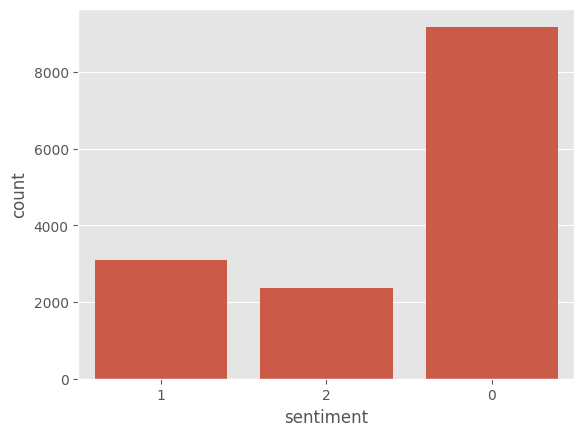

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
sns.countplot(data = df, x = df["sentiment"])
plt.show()

In [ ]:
df["sentiment"].value_counts()

sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

- So, there is no class imbalance both class has an equal number of data.

###### [Nötr sınıfı çıkarma](#p2)

In [ ]:
df["score"].value_counts()

score
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [ ]:
"""print(df.shape)
df = df[df['airline_sentiment'] != 'neutral']
print(df.shape)
df.head(5)"""

"print(df.shape)\ndf = df[df['airline_sentiment'] != 'neutral']\nprint(df.shape)\ndf.head(5)"

In [ ]:
#nötr sınıf 1
print(df.shape)
df = df[df['score'] != '1']
print(df.shape)
df.head(5)

(14640, 13)
(11541, 13)


Text score  \
1  @VirginAmerica plus you've added commercials t...     2   
3  @VirginAmerica it's really aggressive to blast...     0   
4  @VirginAmerica and it's a really big bad thing...     0   
5  @VirginAmerica seriously would pay $30 a fligh...     0   
6  @VirginAmerica yes, nearly every time I fly VX...     2   

                                              hibrit  \
1   virginamerica plus added commercials experien...   
3   virginamerica really aggressive blast obnoxio...   
4                virginamerica really big bad thing    
5   virginamerica seriously would pay flight seat...   
6   virginamerica yes nearly every time fly vx ea...   

                                         USAirPrePro  \
1    virginamerica plu youv ad commerci experi tacki   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   
5  virginamerica serious would pay flight seat di...   
6  virginamerica ye nearli everi time fli vx ear ...   

                                        USAirPrePro2  \
1  virginamerica plus added commercial experience...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   
5  virginamerica seriously would pay flight seat ...   
6  virginamerica yes nearly every time fly vx ear...   

                                        USAirPrePro3  \
1    virginamerica plu youv ad commerci experi tacki   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   
5  virginamerica serious would pay flight seat pl...   
6  virginamerica ye nearli everi time fli vx ear ...   

                                        USAirPrePro4  \
1         virginamerica plu ad commerci experi tacki   
3  virginamerica realli aggress blast obnoxi ente...   
4                 virginamerica realli big bad thing   
5  virginamerica serious would pay flight seat pl...   
6  virginamerica ye nearli everi time fli vx ear ...   

                                   MuammerNLPPrePRro  \
1   VirginAmerica plus you ve added commercials t...   
3   VirginAmerica it really aggressive to blast o...   
4   VirginAmerica and it a really big bad thing a...   
5   VirginAmerica seriously would pay flight for ...   
6   VirginAmerica yes nearly every time fly VX th...   

                                  MuammerNLPPrePRro2  \
1  @VirginAmerica plus you've added commercials t...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   
6  @VirginAmerica yes, nearly every time I fly VX...   

                                  MuammerNLPPrePRro3  \
1   VirginAmerica plus you ve added commercials t...   
3   VirginAmerica it really aggressive to blast o...   
4   VirginAmerica and it a really big bad thing a...   
5   VirginAmerica seriously would pay flight for ...   
6   VirginAmerica yes nearly every time fly VX th...   

                               MuammerNLPLSTMPrePRro text_length sentiment  
1     virginamerica plu 've ad commerci experi tacki          72         2  
3  virginamerica 's realli aggress blast obnoxi e...         126         0  
4              virginamerica 's realli big bad thing          55         0  
5  virginamerica serious would pay flight seat n'...         135         0  
6  virginamerica ye , nearli everi time fli vx ea...          85         2

In [ ]:
#df in indeksini 0 dan başlatır
df=df.reset_index(drop=True)

In [ ]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')


In [ ]:
#df['score'] =df['score'].astype(int)

In [ ]:
#Burda -1 olanlar 0 yapıldı 1 olanlar kaldı
df['score'] = df['score'].apply(lambda x: x + 1 if x == -1 else x)

In [ ]:
#Burda 0 olanlar 0 yapıldı 2 olanlar 1 yapıldı pozitif:1 negative:0
df['score'] = df['score'].apply(lambda x: x -1  if x == 2 else x)

In [ ]:
df["score"].value_counts()

score
0    9178
1    2363
Name: count, dtype: int64

In [ ]:
df['score']

0        1
1        0
2        0
3        0
4        1
        ..
11536    0
11537    0
11538    1
11539    0
11540    0
Name: score, Length: 11541, dtype: int64

In [ ]:
#df = df.drop(df.index[0])
df.head()

Text  score  \
0  @VirginAmerica plus you've added commercials t...      1   
1  @VirginAmerica it's really aggressive to blast...      0   
2  @VirginAmerica and it's a really big bad thing...      0   
3  @VirginAmerica seriously would pay $30 a fligh...      0   
4  @VirginAmerica yes, nearly every time I fly VX...      1   

                                              hibrit  \
0   virginamerica plus added commercials experien...   
1   virginamerica really aggressive blast obnoxio...   
2                virginamerica really big bad thing    
3   virginamerica seriously would pay flight seat...   
4   virginamerica yes nearly every time fly vx ea...   

                                         USAirPrePro  \
0    virginamerica plu youv ad commerci experi tacki   
1  virginamerica realli aggress blast obnoxi ente...   
2                 virginamerica realli big bad thing   
3  virginamerica serious would pay flight seat di...   
4  virginamerica ye nearli everi time fli vx ear ...   

                                        USAirPrePro2  \
0  virginamerica plus added commercial experience...   
1  virginamerica really aggressive blast obnoxiou...   
2                 virginamerica really big bad thing   
3  virginamerica seriously would pay flight seat ...   
4  virginamerica yes nearly every time fly vx ear...   

                                        USAirPrePro3  \
0    virginamerica plu youv ad commerci experi tacki   
1  virginamerica realli aggress blast obnoxi ente...   
2                 virginamerica realli big bad thing   
3  virginamerica serious would pay flight seat pl...   
4  virginamerica ye nearli everi time fli vx ear ...   

                                        USAirPrePro4  \
0         virginamerica plu ad commerci experi tacki   
1  virginamerica realli aggress blast obnoxi ente...   
2                 virginamerica realli big bad thing   
3  virginamerica serious would pay flight seat pl...   
4  virginamerica ye nearli everi time fli vx ear ...   

                                   MuammerNLPPrePRro  \
0   VirginAmerica plus you ve added commercials t...   
1   VirginAmerica it really aggressive to blast o...   
2   VirginAmerica and it a really big bad thing a...   
3   VirginAmerica seriously would pay flight for ...   
4   VirginAmerica yes nearly every time fly VX th...   

                                  MuammerNLPPrePRro2  \
0  @VirginAmerica plus you've added commercials t...   
1  @VirginAmerica it's really aggressive to blast...   
2  @VirginAmerica and it's a really big bad thing...   
3  @VirginAmerica seriously would pay $30 a fligh...   
4  @VirginAmerica yes, nearly every time I fly VX...   

                                  MuammerNLPPrePRro3  \
0   VirginAmerica plus you ve added commercials t...   
1   VirginAmerica it really aggressive to blast o...   
2   VirginAmerica and it a really big bad thing a...   
3   VirginAmerica seriously would pay flight for ...   
4   VirginAmerica yes nearly every time fly VX th...   

                               MuammerNLPLSTMPrePRro text_length sentiment  
0     virginamerica plu 've ad commerci experi tacki          72         2  
1  virginamerica 's realli aggress blast obnoxi e...         126         0  
2              virginamerica 's realli big bad thing          55         0  
3  virginamerica serious would pay flight seat n'...         135         0  
4  virginamerica ye , nearli everi time fli vx ea...          85         2

In [ ]:
df.columns

Index(['Text', 'score', 'hibrit', 'USAirPrePro', 'USAirPrePro2',
       'USAirPrePro3', 'USAirPrePro4', 'MuammerNLPPrePRro',
       'MuammerNLPPrePRro2', 'MuammerNLPPrePRro3', 'MuammerNLPLSTMPrePRro',
       'text_length', 'sentiment'],
      dtype='object')

In [ ]:
df.shape

(11541, 13)

In [ ]:
print(len(df))

11541


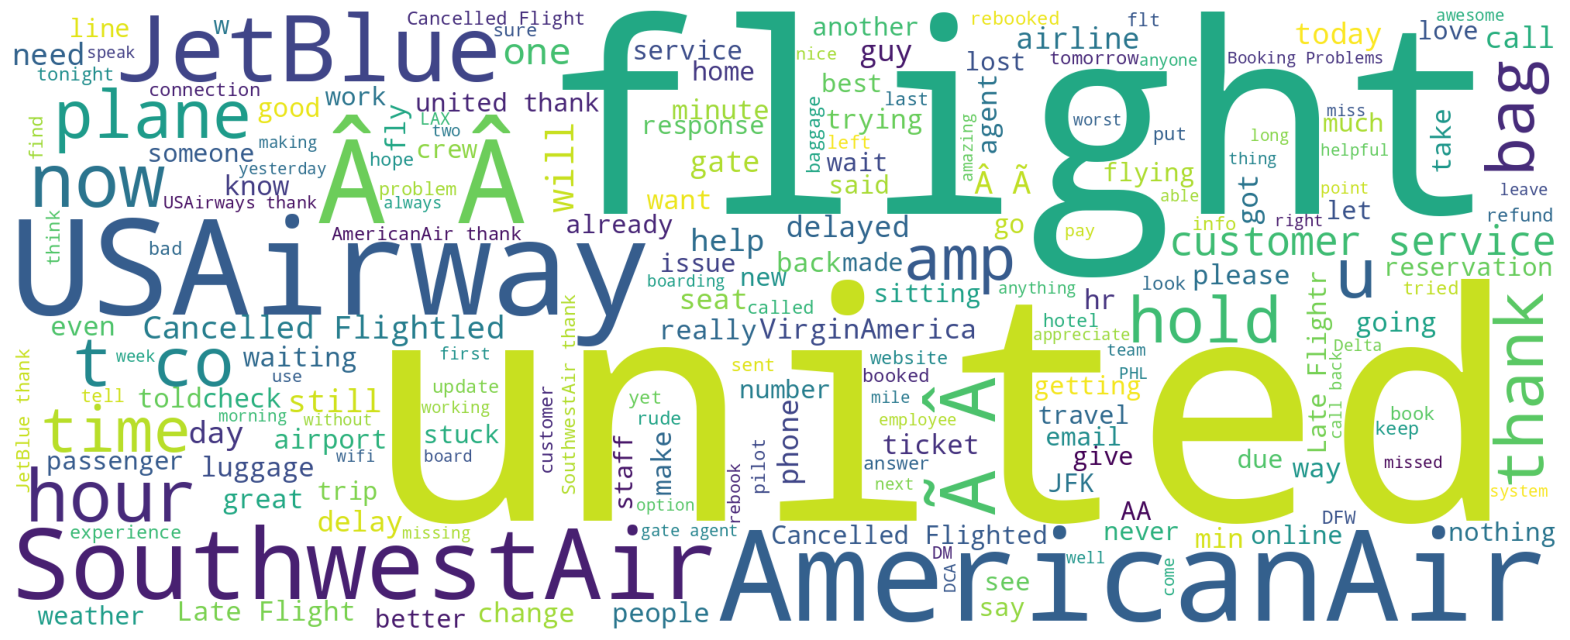

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###### [Veri setinden kullanılacak sütun seçilmesi](#b1)

In [ ]:
df.columns

Index(['Text', 'score', 'hibrit', 'USAirPrePro', 'USAirPrePro2',
       'USAirPrePro3', 'USAirPrePro4', 'MuammerNLPPrePRro',
       'MuammerNLPPrePRro2', 'MuammerNLPPrePRro3', 'MuammerNLPLSTMPrePRro',
       'text_length', 'sentiment'],
      dtype='object')

In [ ]:
#Kullanıacak kolon adi girin sonra çalıştırın. Yukarıdaki kolon isimlerinden seç
secilen_kolon_adi='USAirPrePro2'
secilen_sentiment_kolon_adi='score'
#secilen_sentiment_kolon_adi='score2'
#secilen_kolon_adi='hibrit'
#secilen_kolon_adi='Text'

In [ ]:
#x burda veri setinden seçilen sütunun listesi
x_liste=df[secilen_kolon_adi]
y_liste=df[secilen_sentiment_kolon_adi]


In [ ]:
from tkinter import Y
#X_df burda veri setinden seçilen sütunun listesi
X_df = x_liste.to_frame(name=secilen_kolon_adi)
Y_df = y_liste.to_frame(name=secilen_sentiment_kolon_adi)


In [ ]:
X_df.shape

(11541, 1)

In [ ]:
print(len(df))

11541


In [ ]:
data=df[[secilen_kolon_adi,secilen_sentiment_kolon_adi]]
data=data.reset_index(drop=True)
data

USAirPrePro2  score
0      virginamerica plus added commercial experience...      1
1      virginamerica really aggressive blast obnoxiou...      0
2                     virginamerica really big bad thing      0
3      virginamerica seriously would pay flight seat ...      0
4      virginamerica yes nearly every time fly vx ear...      1
...                                                  ...    ...
11536  americanair flight cancelled flightled leaving...      0
11537                        americanair right cue delay      0
11538     americanair thank got different flight chicago      1
11539  americanair leaving minute late flight warning...      0
11540  americanair money change flight answer phone s...      0

[11541 rows x 2 columns]

In [ ]:
data=pd.concat([X_df,Y_df],axis=1)
data=data.reset_index(drop=True)

In [ ]:
data

USAirPrePro2  score
0      virginamerica plus added commercial experience...      1
1      virginamerica really aggressive blast obnoxiou...      0
2                     virginamerica really big bad thing      0
3      virginamerica seriously would pay flight seat ...      0
4      virginamerica yes nearly every time fly vx ear...      1
...                                                  ...    ...
11536  americanair flight cancelled flightled leaving...      0
11537                        americanair right cue delay      0
11538     americanair thank got different flight chicago      1
11539  americanair leaving minute late flight warning...      0
11540  americanair money change flight answer phone s...      0

[11541 rows x 2 columns]

In [ ]:
data.head()

USAirPrePro2  score
0  virginamerica plus added commercial experience...      1
1  virginamerica really aggressive blast obnoxiou...      0
2                 virginamerica really big bad thing      0
3  virginamerica seriously would pay flight seat ...      0
4  virginamerica yes nearly every time fly vx ear...      1

In [ ]:
X_df.head()

USAirPrePro2
0  virginamerica plus added commercial experience...
1  virginamerica really aggressive blast obnoxiou...
2                 virginamerica really big bad thing
3  virginamerica seriously would pay flight seat ...
4  virginamerica yes nearly every time fly vx ear...

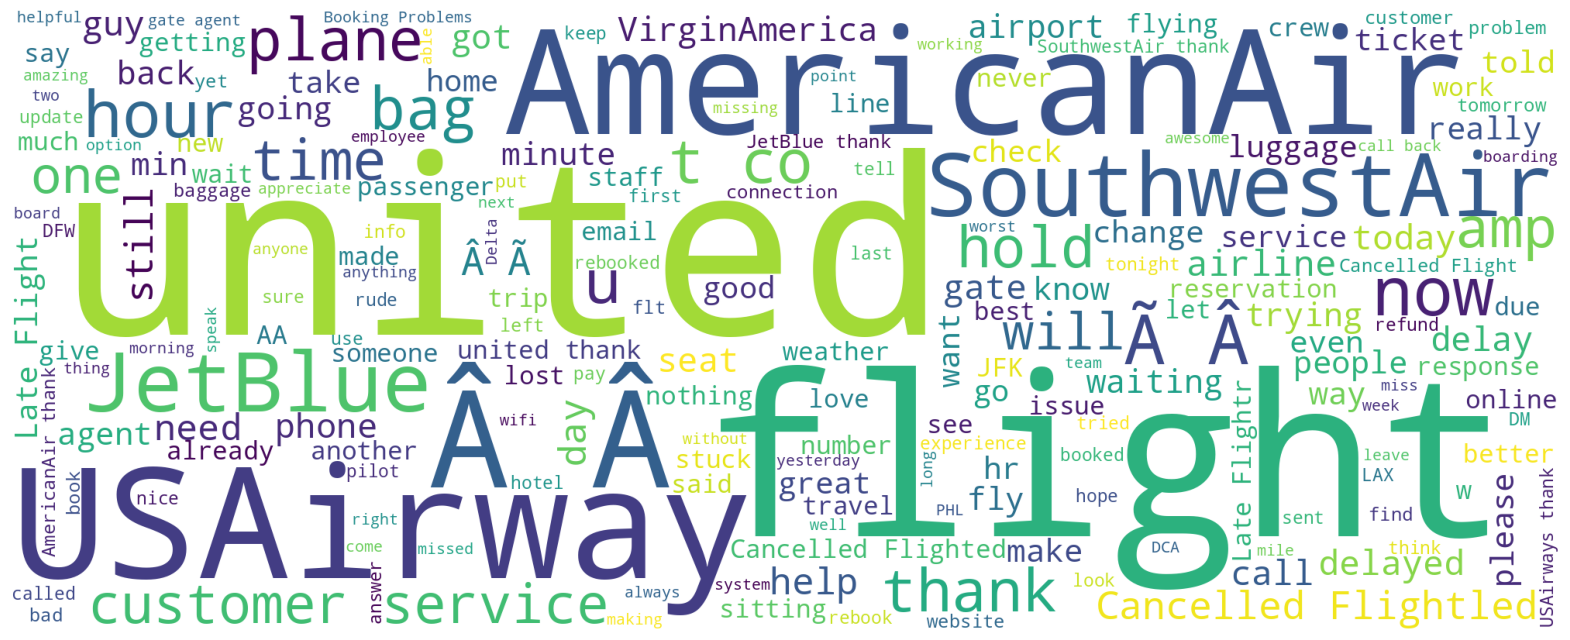

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df['Text'])
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

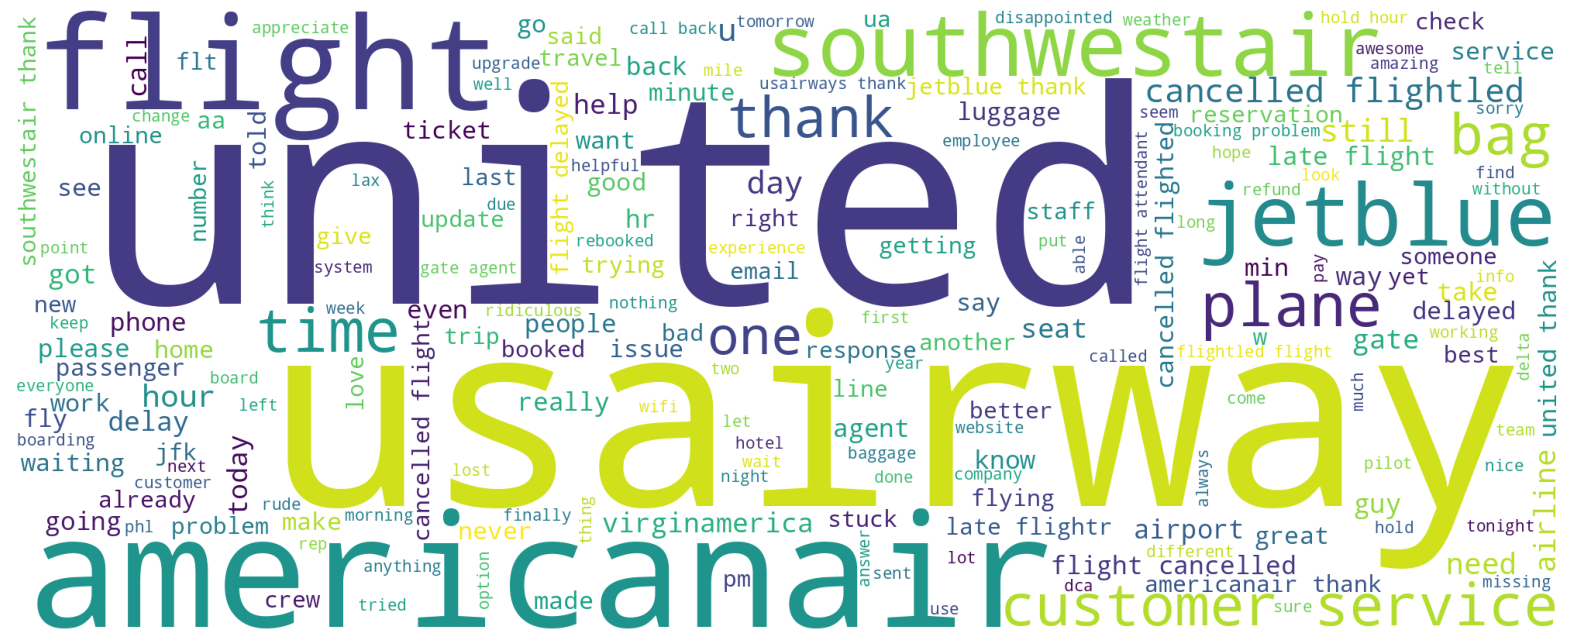

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in x_liste)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###### [Veri ön işleme](#b2)

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
import en_core_web_sm
# Gerekli kaynakları indir
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


class CustomPreprocess():

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()

        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)

        return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
custom = CustomPreprocess()
custom.preprocess_text("I thought this was a wonderful way to spend time on a too hot summer weekend")

'thought wonderful way spend time hot summer weekend'

In [ ]:
"""x = []
sentences = list(df['review'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))"""

"x = []\nsentences = list(df['review'])\nfor sen in sentences:\n    x.append(custom.preprocess_text(sen))"

In [ ]:
"""x = []
sentences = list(df['Text'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))"""

"x = []\nsentences = list(df['Text'])\nfor sen in sentences:\n    x.append(custom.preprocess_text(sen))"

In [ ]:
#x=df['Text']
#x

In [ ]:
#df['score'] = pd.to_numeric(df['score'], errors='coerce')


In [ ]:
#Burda -1 olanlar 0 yapıldı 1 olanlar kaldı
#df['score2'] = df['score'].apply(lambda x: x + 1 if x == -1 else x)

In [ ]:
"""y=df['score2']
y"""

"y=df['score2']\ny"

In [ ]:
"""y = df['sentiment']
sentiment_map = {'negative' : 0, 'positive': 1}
y = np.array(y.map(sentiment_map))
y[:15]"""

"y = df['sentiment']\nsentiment_map = {'negative' : 0, 'positive': 1}\ny = np.array(y.map(sentiment_map))\ny[:15]"

###### [Train-Test Ayrımı](#b2)

In [ ]:
#x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x_liste,y_liste,test_size=0.3,random_state=42)

## [EMBEDİNG](#b2)

#### GLOVE embeding

###### [Tokenize ve embeding](#b2)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

8673

In [ ]:
maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [ ]:
x_train

array([[   3,   18,   27, ...,    0,    0,    0],
       [   6, 2124,   24, ...,    0,    0,    0],
       [   5, 1592, 2694, ...,    0,    0,    0],
       ...,
       [ 938,  421,    6, ...,    0,    0,    0],
       [   2,  644,    9, ...,    0,    0,    0],
       [   3, 8669, 1404, ...,    0,    0,    0]], dtype=int32)

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
"""

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# GloVe dosya yolu (Google Drive'daki konum)
glove_path = "/content/drive/My Drive/BitirmeMuammer/imdb/glove.6B.100d.txt"

# Embedding sözlüğünü oluşturma
embeddings_dictionary = dict()
with open(glove_path, encoding='utf8') as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions


In [ ]:
print(list(tokenizer.word_index.items())[:15])

[('flight', 1), ('united', 2), ('usairways', 3), ('americanair', 4), ('southwestair', 5), ('jetblue', 6), ('hour', 7), ('get', 8), ('thanks', 9), ('cancelled', 10), ('service', 11), ('time', 12), ('customer', 13), ('help', 14), ('bag', 15)]


In [ ]:
embeddings_dictionary.get('Airlines')

In [ ]:
embedding_matrix = np.zeros((vocab_length, 100)) #100
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(8673, 100)

#### FAST TEXT Embeding

✅ FastText .vec kullanan kod

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Tokenizer ile kelimeleri sayılara dönüştür
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Gerekirse padding uygula
max_len = 100  # Cümle uzunluğunu sen belirle
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
x_test = pad_sequences(x_test, padding='post', maxlen=max_len)

# 2. FastText .vec dosyasının yolu
fasttext_path = "/content/drive/My Drive/Bitirme/Embedings/Fast_Text/wiki-news-300d-1M.vec"

# 3. FastText embedding sözlüğünü oluştur
embeddings_dictionary = dict()
with open(fasttext_path, encoding='utf8', errors='ignore') as file:
    next(file)  # İlk satır genelde başlık (kelime sayısı ve boyut bilgisi), atlanır
    for line in file:
        values = line.rstrip().split(' ')
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dictionary[word] = vector

# 4. Embedding matrisi oluştur
embedding_dim = 300  # FastText vektör boyutu
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    vector = embeddings_dictionary.get(word)
    if vector is not None:
        embedding_matrix[index] = vector
    else:
        # Eğer kelime embedding sözlüğünde yoksa, sıfır vektör kalır
        pass


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # Önceden eğitilmiş embedding'i sabit tutmak istiyorsan
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### W2V Embeding

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
def preprocess_text3(text):

    tokens = word_tokenize(text)

    return tokens

In [ ]:
#Ön işleme yapmayacaksak
tokenized_documents=[preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]

In [ ]:
len(tokenized_documents)

11541

In [ ]:
tokenized_documents[0]

['virginamerica', 'plus', 'added', 'commercial', 'experience', 'tacky']

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=10563, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
flight : 0
united : 1
usairways : 2
americanair : 3
southwestair : 4
jetblue : 5
get : 6
hour : 7
thanks : 8
cancelled : 9
service : 10
customer : 11
time : 12
bag : 13
help : 14
plane : 15
u : 16
hold : 17
would : 18
thank : 19
still : 20
day : 21
call : 22
delayed : 23
airline : 24
one : 25
gate : 26
flightled : 27
need : 28
back : 29
phone : 30
hr : 31
delay : 32
got : 33
agent : 34
seat : 35
late : 36
please : 37
guy : 38
min : 39
like : 40
waiting : 41
today : 42
virginamerica : 43
minute : 44
great : 45
make : 46
wait : 47
fly : 48
going : 49


In [ ]:
max_length = X_df[secilen_kolon_adi].apply(lambda x: len(x.split())).max()

In [ ]:
max_length

21

In [ ]:
max_length_index = X_df[secilen_kolon_adi].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 9180


In [ ]:
X_df.at[max_length_index, secilen_kolon_adi]

'usairways travelling pwm atl sunday flight got cancelled flightled new flight cancelled flightled got disconnected reflight booking problem'

In [ ]:
X_df.at[max_length_index, secilen_kolon_adi]

'usairways travelling pwm atl sunday flight got cancelled flightled new flight cancelled flightled got disconnected reflight booking problem'

In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]]

In [ ]:
sequences = [
    [word2vec_model.wv.key_to_index[word] if word in word2vec_model.wv.key_to_index else None for word in text]
    for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]
]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
sequences = [
    [word2vec_model.wv.key_to_index[word] for word in text if word in word2vec_model.wv.key_to_index]
    for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]
]

# Pad sequences after removing None values
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [ ]:
len(sequences)

11541

In [ ]:
sequences[0]

[43, 402, 1039, 1174, 85, 4693]

In [ ]:
padded_sequences.shape

(11541, 21)

In [ ]:
y = np.asarray(df[secilen_sentiment_kolon_adi])

In [ ]:
jumlah_kelas=len(df[secilen_sentiment_kolon_adi].unique())

In [ ]:
jumlah_kelas

2

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
padded_sequences

array([[  43,  402, 1039, ...,    0,    0,    0],
       [  43,   57, 3291, ...,    0,    0,    0],
       [  43,   57,  305, ...,    0,    0,    0],
       ...,
       [   3,   19,   33, ...,    0,    0,    0],
       [   3,  345,   44, ...,    0,    0,    0],
       [   3,  236,   60, ...,    0,    0,    0]], dtype=int32)

###### [Test_train ayrımı ve embeding yapma](#p2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## [FAST TEXT TEMELLİ CNN2](#b2)


###### [1. Deneme Drop out oranı 0,5 ](#b3)

[Drop out oranını 0,5 yaptık](#b2)

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False  # Önceden eğitilmiş embedding'i sabit tutmak istiyorsan
)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
#embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,601,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,900 (9.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,601,900 (9.93 MB)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 100,
                      verbose=1, validation_split =0.2,callbacks=[early_stop])


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - accuracy: 0.8007 - loss: 0.4519 - val_accuracy: 0.8496 - val_loss: 0.3581
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 500ms/step - accuracy: 0.8906 - loss: 0.2866 - val_accuracy: 0.9035 - val_loss: 0.2362
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 483ms/step - accuracy: 0.9143 - loss: 0.2169 - val_accuracy: 0.9022 - val_loss: 0.2412
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 44s 539ms/step - accuracy: 0.9243 - loss: 0.1950 - val_accuracy: 0.9097 - val_loss: 0.2257
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 502ms/step - accuracy: 0.9408 - loss: 0.1540 - val_accuracy: 0.9196 - val_loss: 0.2071
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 468ms/step - accuracy: 0.9575 - loss: 0.1233 - val_accuracy: 0.9121 - val_loss: 0.2301
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 503ms/step - accuracy: 0.9700 - loss: 0.0864 - val_accuracy: 0.9084 - val_loss: 0.2274
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 503ms/step - accuracy: 0.9778 - loss: 0.0709 - 

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 91.71%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95      2771
    Positive       0.80      0.78      0.79       692

    accuracy                           0.92      3463
   macro avg       0.87      0.87      0.87      3463
weighted avg       0.92      0.92      0.92      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


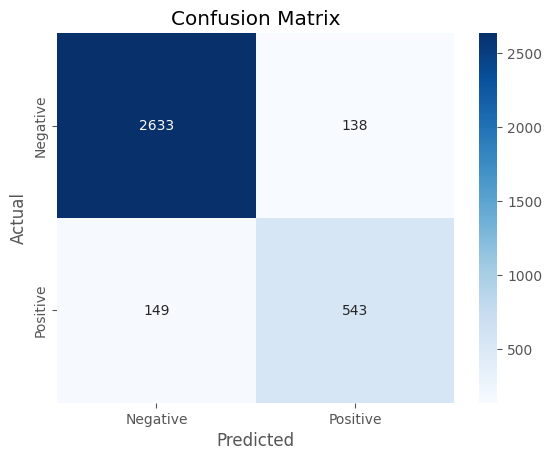

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.95      0.95      2771
    Positive       0.80      0.78      0.79       692

    accuracy                           0.92      3463
   macro avg       0.87      0.87      0.87      3463
weighted avg       0.92      0.92      0.92      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.1081  0.1338 -0.0607 ...  0.0963 -0.0062  0.1148]
 [ 0.0686 -0.1197  0.0961 ...  0.0763  0.06    0.0619]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [-0.0509  0.2774  0.0104 ... -0.0438 -0.0627 -0.1809]
 [-0.0306  0.1151  0.1171 ...  0.2656 -0.0108  0.0154]]


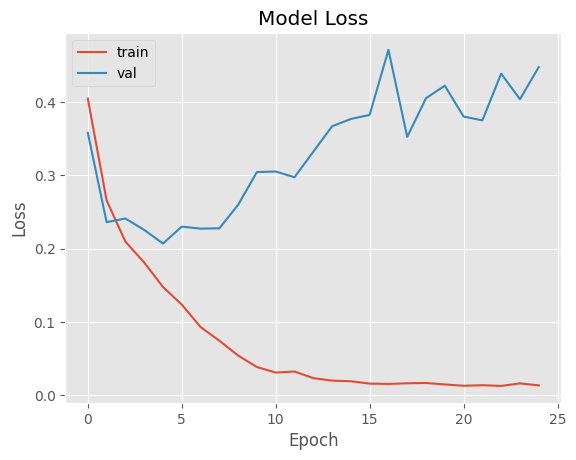

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

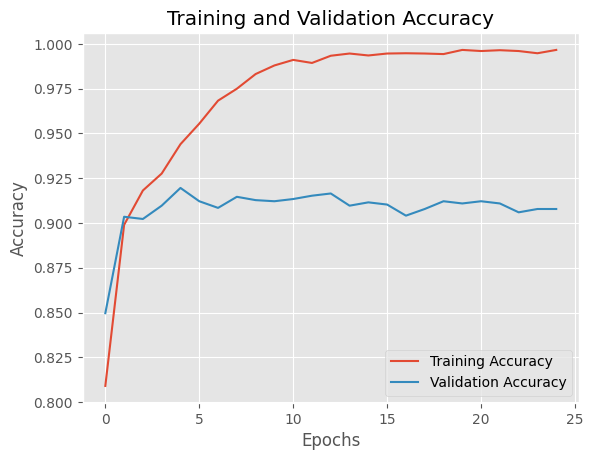

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy =history_cnn.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [2. Deneme Dropout 0,6 yapıldı](#b3)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
#embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.6))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history_cnn2 = cnn.fit(x_train,y_train, batch_size=128, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 513ms/step - accuracy: 0.8008 - loss: 0.4341 - val_accuracy: 0.8845 - val_loss: 0.2920
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 587ms/step - accuracy: 0.8979 - loss: 0.2671 - val_accuracy: 0.8993 - val_loss: 0.2514
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 565ms/step - accuracy: 0.9112 - loss: 0.2202 - val_accuracy: 0.9002 - val_loss: 0.2432
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 43s 615ms/step - accuracy: 0.9278 - loss: 0.1877 - val_accuracy: 0.9059 - val_loss: 0.2288
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 505ms/step - accuracy: 0.9394 - loss: 0.1587 - val_accuracy: 0.9125 - val_loss: 0.2165
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 537ms/step - accuracy: 0.9468 - loss: 0.1432 - val_accuracy: 0.9146 - val_loss: 0.2196
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 568ms/step - accuracy: 0.9610 - loss: 0.1163 - val_accuracy: 0.9051 - val_loss: 0.2608
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 525ms/step - accuracy: 0.9647 - loss: 0.1016 - 

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 91.37%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      2771
    Positive       0.84      0.71      0.77       692

    accuracy                           0.91      3463
   macro avg       0.88      0.84      0.86      3463
weighted avg       0.91      0.91      0.91      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step


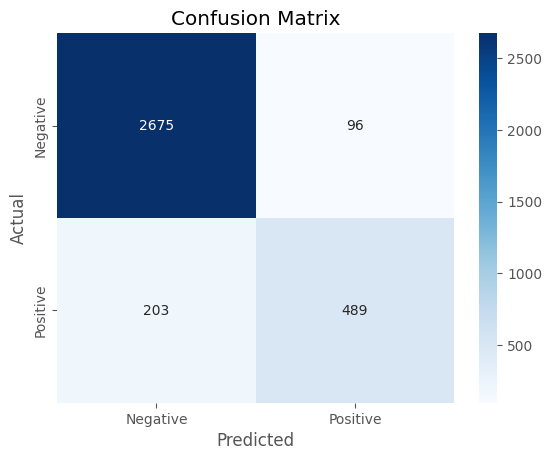

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      2771
    Positive       0.84      0.71      0.77       692

    accuracy                           0.91      3463
   macro avg       0.88      0.84      0.86      3463
weighted avg       0.91      0.91      0.91      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.1081  0.1338 -0.0607 ...  0.0963 -0.0062  0.1148]
 [ 0.0686 -0.1197  0.0961 ...  0.0763  0.06    0.0619]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [-0.0509  0.2774  0.0104 ... -0.0438 -0.0627 -0.1809]
 [-0.0306  0.1151  0.1171 ...  0.2656 -0.0108  0.0154]]


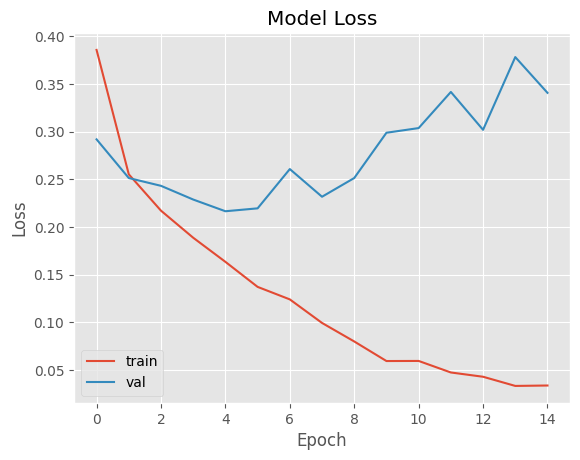

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn2.history['loss'], label='train')
plt.plot(history_cnn2.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

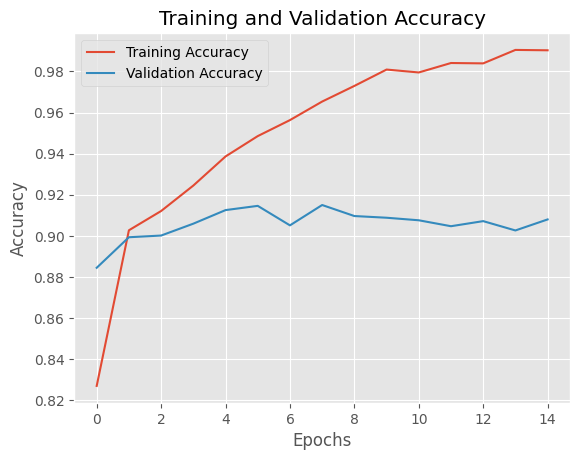

In [ ]:
accuracy = history_cnn2.history['accuracy']
val_accuracy =history_cnn2.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [3. Deneme  batch_size 64](#b3)

In [ ]:
from keras.layers import Conv1D
cnn3 = Sequential()
#embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn3.add(embedding_layer)
cnn3.add(Conv1D(128,5,activation = 'relu'))
cnn3.add(Dropout(0.6))

cnn3.add(Conv1D(256,5,activation = 'relu'))
cnn3.add(GlobalMaxPooling1D())

cnn3.add(Dense(1,activation = 'sigmoid'))
cnn3.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history_cnn3 = cnn3.fit(x_train,y_train, batch_size=64, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 432ms/step - accuracy: 0.7886 - loss: 0.4460 - val_accuracy: 0.9043 - val_loss: 0.2457
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 419ms/step - accuracy: 0.9153 - loss: 0.2271 - val_accuracy: 0.9121 - val_loss: 0.2238
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 43s 484ms/step - accuracy: 0.9266 - loss: 0.1935 - val_accuracy: 0.9076 - val_loss: 0.2250
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 582ms/step - accuracy: 0.9376 - loss: 0.1580 - val_accuracy: 0.9130 - val_loss: 0.2181
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 65s 384ms/step - accuracy: 0.9532 - loss: 0.1313 - val_accuracy: 0.9113 - val_loss: 0.2334
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 35s 313ms/step - accuracy: 0.9618 - loss: 0.1083 - val_accuracy: 0.9109 - val_loss: 0.2313
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 38s 289ms/step - accuracy: 0.9703 - loss: 0.0876 - val_accuracy: 0.9117 - val_loss: 0.2650
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 294ms/step - accuracy: 0.9777 - loss: 0.0678 - 

In [ ]:
loss, accuracy = cnn3.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 91.13%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn3.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.95      2771
    Positive       0.85      0.68      0.75       692

    accuracy                           0.91      3463
   macro avg       0.88      0.82      0.85      3463
weighted avg       0.91      0.91      0.91      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


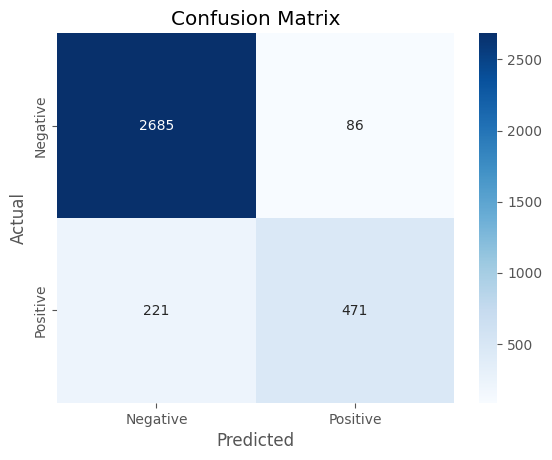

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.95      2771
    Positive       0.85      0.68      0.75       692

    accuracy                           0.91      3463
   macro avg       0.88      0.82      0.85      3463
weighted avg       0.91      0.91      0.91      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn3.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.1081  0.1338 -0.0607 ...  0.0963 -0.0062  0.1148]
 [ 0.0686 -0.1197  0.0961 ...  0.0763  0.06    0.0619]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [-0.0509  0.2774  0.0104 ... -0.0438 -0.0627 -0.1809]
 [-0.0306  0.1151  0.1171 ...  0.2656 -0.0108  0.0154]]


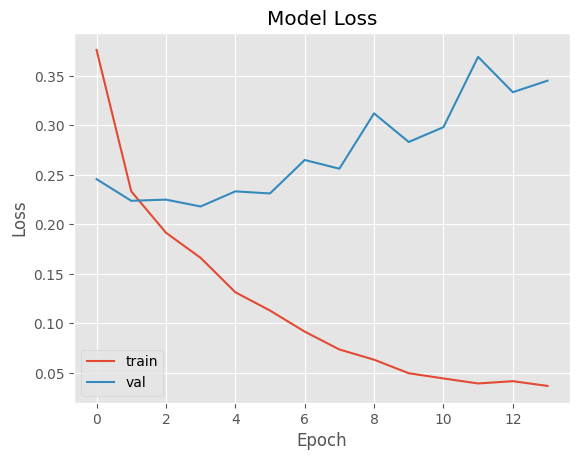

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn3.history['loss'], label='train')
plt.plot(history_cnn3.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

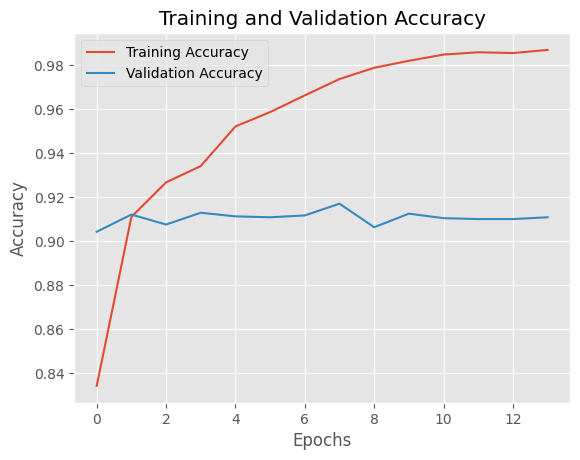

In [ ]:
accuracy = history_cnn3.history['accuracy']
val_accuracy =history_cnn3.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [4. Deneme  batch_size 256](#b3)

In [ ]:
from keras.layers import Conv1D
cnn4 = Sequential()
#embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn4.add(embedding_layer)
cnn4.add(Conv1D(128,5,activation = 'relu'))
cnn4.add(Dropout(0.6))

cnn4.add(Conv1D(256,5,activation = 'relu'))
cnn4.add(GlobalMaxPooling1D())

cnn4.add(Dense(1,activation = 'sigmoid'))
cnn4.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history_cnn4 = cnn4.fit(x_train,y_train, batch_size=256, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7922 - loss: 0.4662 - val_accuracy: 0.8131 - val_loss: 0.3899
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8318 - loss: 0.3581 - val_accuracy: 0.8940 - val_loss: 0.2858
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 991ms/step - accuracy: 0.8999 - loss: 0.2595 - val_accuracy: 0.9022 - val_loss: 0.2522
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9188 - loss: 0.2212 - val_accuracy: 0.8940 - val_loss: 0.2627
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9191 - loss: 0.2055 - val_accuracy: 0.9138 - val_loss: 0.2319
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9278 - loss: 0.1881 - val_accuracy: 0.8960 - val_loss: 0.2620
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9331 - loss: 0.1683 - val_accuracy: 0.8969 - val_loss: 0.2610
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9429 - loss: 0.1454 - val_accuracy: 0.8969 

In [ ]:
loss, accuracy = cnn4.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 90.93%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn4.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.94      2771
    Positive       0.85      0.67      0.75       692

    accuracy                           0.91      3463
   macro avg       0.88      0.82      0.85      3463
weighted avg       0.91      0.91      0.91      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step


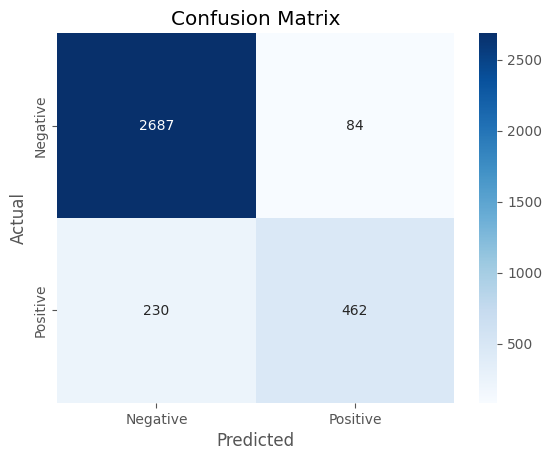

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.94      2771
    Positive       0.85      0.67      0.75       692

    accuracy                           0.91      3463
   macro avg       0.88      0.82      0.85      3463
weighted avg       0.91      0.91      0.91      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn4.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn4.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 300, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn4.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.1081  0.1338 -0.0607 ...  0.0963 -0.0062  0.1148]
 [ 0.0686 -0.1197  0.0961 ...  0.0763  0.06    0.0619]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [-0.0509  0.2774  0.0104 ... -0.0438 -0.0627 -0.1809]
 [-0.0306  0.1151  0.1171 ...  0.2656 -0.0108  0.0154]]


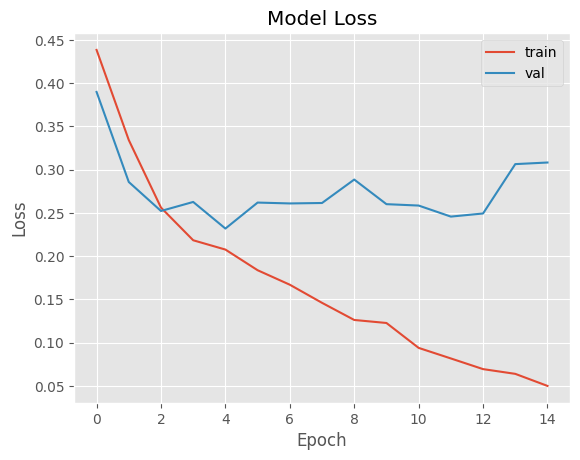

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn4.history['loss'], label='train')
plt.plot(history_cnn4.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

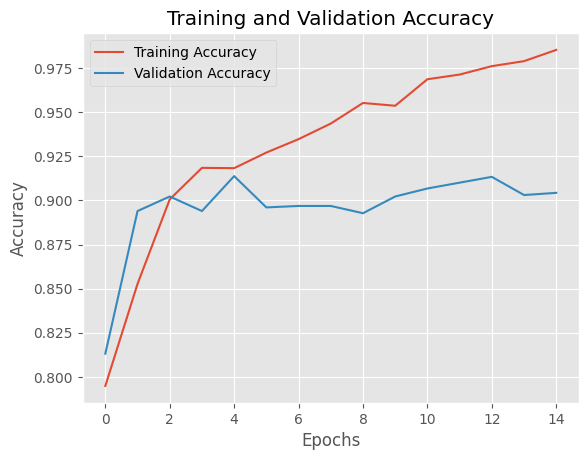

In [ ]:
accuracy = history_cnn4.history['accuracy']
val_accuracy =history_cnn4.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## [GLOVE TEMELLİ CNN2](#b2)


###### [1. Deneme](#b3)

[Drop out oranını 0,5 yaptık](#b2)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       867,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867,300 (3.31 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 867,300 (3.31 MB)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 100,
                      verbose=1, validation_split =0.2,callbacks=[early_stop])


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 373ms/step - accuracy: 0.9226 - loss: 0.1884 - val_accuracy: 0.9047 - val_loss: 0.2457
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.9355 - loss: 0.1626 - val_accuracy: 0.9059 - val_loss: 0.2400
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 421ms/step - accuracy: 0.9440 - loss: 0.1435 - val_accuracy: 0.9066 - val_loss: 0.2373
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 37s 344ms/step - accuracy: 0.9556 - loss: 0.1238 - val_accuracy: 0.9059 - val_loss: 0.2386
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 375ms/step - accuracy: 0.9601 - loss: 0.1102 - val_accuracy: 0.9066 - val_loss: 0.2465
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.9670 - loss: 0.1026 - val_accuracy: 0.9028 - val_loss: 0.2579
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 356ms/step - accuracy: 0.9656 - loss: 0.0880 - val_accuracy: 0.8979 - val_loss: 0.3417
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.9698 - loss: 0.0841 - 

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 90.59%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      2771
    Positive       0.79      0.72      0.75       692

    accuracy                           0.91      3463
   macro avg       0.86      0.84      0.85      3463
weighted avg       0.90      0.91      0.90      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


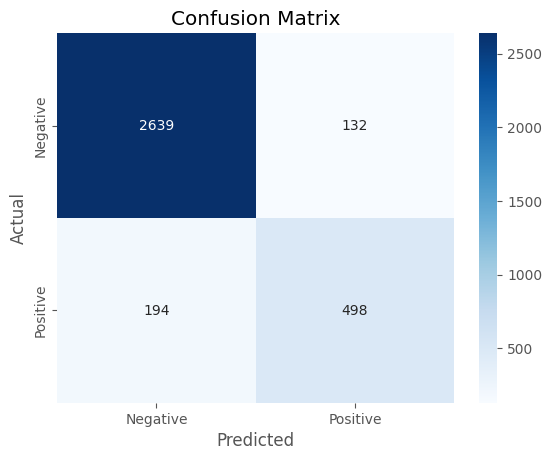

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      2771
    Positive       0.79      0.72      0.75       692

    accuracy                           0.91      3463
   macro avg       0.86      0.84      0.85      3463
weighted avg       0.90      0.91      0.90      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1219    -0.65646    0.50855   ... -0.23317   -0.013865  -0.78455  ]
 [ 0.21733    0.56116    0.63062   ...  0.0098267  0.39708   -0.34708  ]
 ...
 [ 0.76337   -0.10913   -0.60247   ... -0.28679   -0.32503    0.21777  ]
 [ 0.58078   -0.56018   -0.24877   ... -0.32196    0.18122   -0.37865  ]
 [-1.5448     0.17873   -0.061989  ...  0.49215   -0.34351    0.080519 ]]


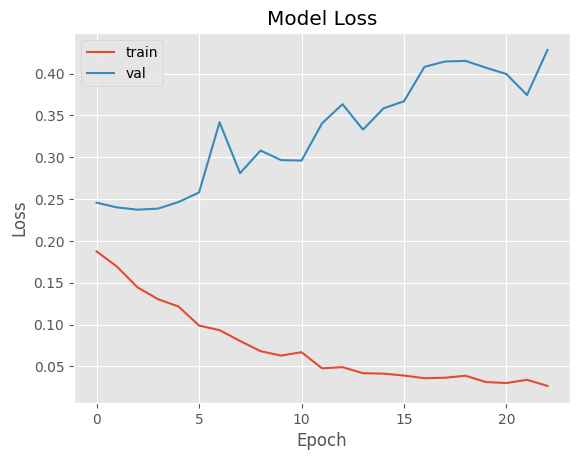

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

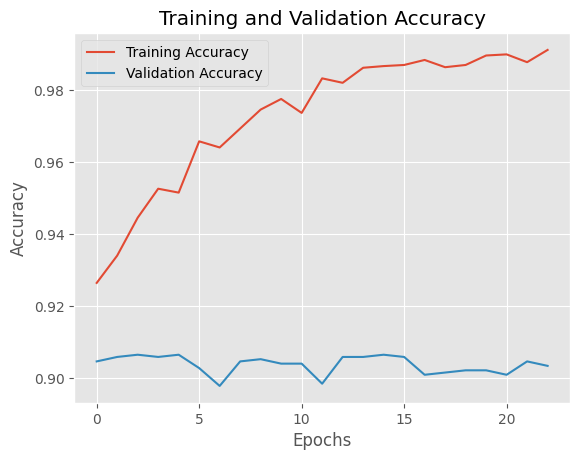

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy =history_cnn.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [2. Deneme Dropout 0,6 yapıldı](#b3)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.6))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 459ms/step - accuracy: 0.7384 - loss: 0.5665 - val_accuracy: 0.8449 - val_loss: 0.3678
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 409ms/step - accuracy: 0.8635 - loss: 0.3372 - val_accuracy: 0.8593 - val_loss: 0.3255
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.8822 - loss: 0.2908 - val_accuracy: 0.8952 - val_loss: 0.2644
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 360ms/step - accuracy: 0.8995 - loss: 0.2453 - val_accuracy: 0.8998 - val_loss: 0.2505
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.9078 - loss: 0.2307 - val_accuracy: 0.8944 - val_loss: 0.2569
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.9153 - loss: 0.2000 - val_accuracy: 0.9043 - val_loss: 0.2388
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.9298 - loss: 0.1818 - val_accuracy: 0.9002 - val_loss: 0.2512
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.9337 - loss: 0.1680 - 

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 90.10%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94      2771
    Positive       0.82      0.65      0.72       692

    accuracy                           0.90      3463
   macro avg       0.87      0.81      0.83      3463
weighted avg       0.90      0.90      0.90      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


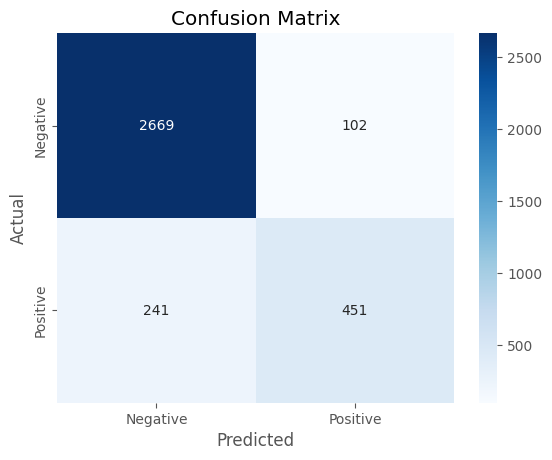

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94      2771
    Positive       0.82      0.65      0.72       692

    accuracy                           0.90      3463
   macro avg       0.87      0.81      0.83      3463
weighted avg       0.90      0.90      0.90      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1219    -0.65646    0.50855   ... -0.23317   -0.013865  -0.78455  ]
 [ 0.21733    0.56116    0.63062   ...  0.0098267  0.39708   -0.34708  ]
 ...
 [ 0.76337   -0.10913   -0.60247   ... -0.28679   -0.32503    0.21777  ]
 [ 0.58078   -0.56018   -0.24877   ... -0.32196    0.18122   -0.37865  ]
 [-1.5448     0.17873   -0.061989  ...  0.49215   -0.34351    0.080519 ]]


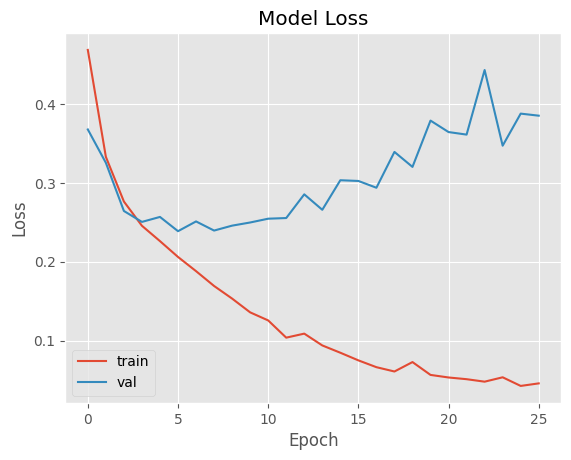

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

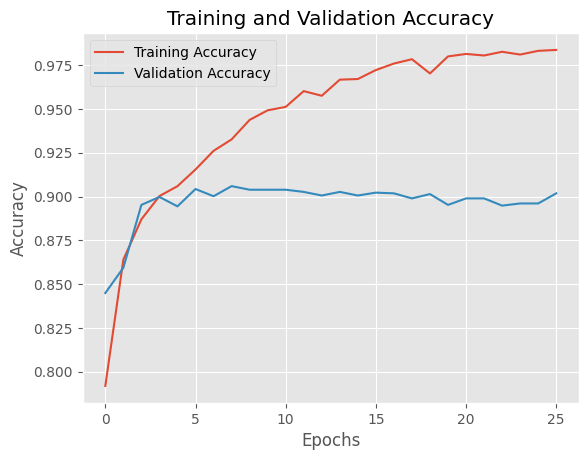

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy =history_cnn.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [3. Deneme  batch_size 64](#b3)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.6))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=64, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.9197 - loss: 0.1970 - val_accuracy: 0.8824 - val_loss: 0.3092
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.9355 - loss: 0.1677 - val_accuracy: 0.9022 - val_loss: 0.2472
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.9331 - loss: 0.1641 - val_accuracy: 0.8973 - val_loss: 0.2625
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9417 - loss: 0.1451 - val_accuracy: 0.8989 - val_loss: 0.2655
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.9575 - loss: 0.1165 - val_accuracy: 0.8936 - val_loss: 0.3097
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.9652 - loss: 0.0950 - val_accuracy: 0.8948 - val_loss: 0.3056
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.9650 - loss: 0.0922 - val_accuracy: 0.8998 - val_loss: 0.2892
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.9634 - loss: 0.0924 - 

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 90.53%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94      2771
    Positive       0.82      0.65      0.72       692

    accuracy                           0.90      3463
   macro avg       0.87      0.81      0.83      3463
weighted avg       0.90      0.90      0.90      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


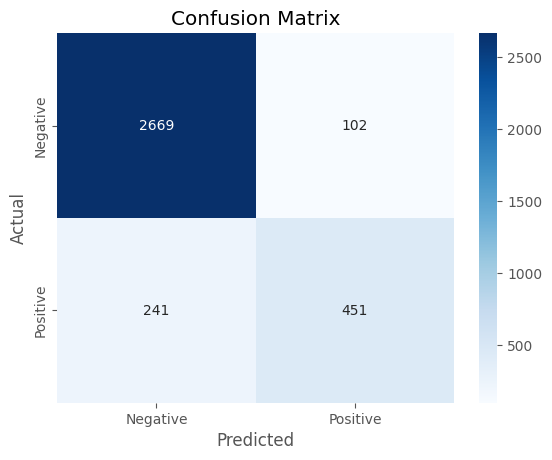

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.96      0.94      2771
    Positive       0.82      0.65      0.72       692

    accuracy                           0.90      3463
   macro avg       0.87      0.81      0.83      3463
weighted avg       0.90      0.90      0.90      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1219    -0.65646    0.50855   ... -0.23317   -0.013865  -0.78455  ]
 [ 0.21733    0.56116    0.63062   ...  0.0098267  0.39708   -0.34708  ]
 ...
 [ 0.76337   -0.10913   -0.60247   ... -0.28679   -0.32503    0.21777  ]
 [ 0.58078   -0.56018   -0.24877   ... -0.32196    0.18122   -0.37865  ]
 [-1.5448     0.17873   -0.061989  ...  0.49215   -0.34351    0.080519 ]]


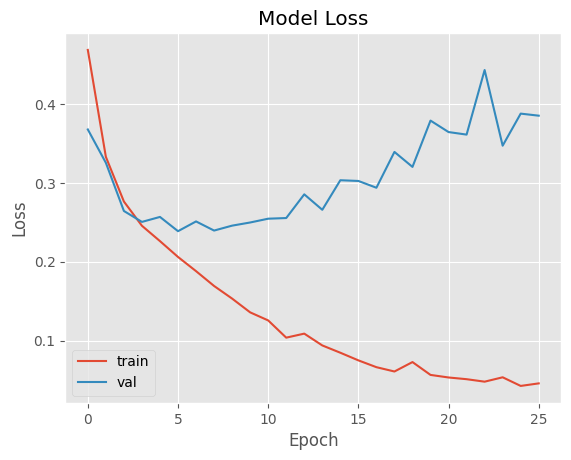

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

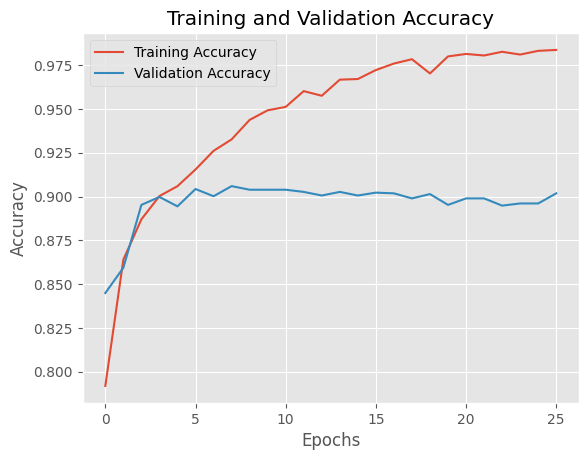

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy =history_cnn.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### [4. Deneme  batch_size 256](#b3)

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.6))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=256, epochs = 100,
                      verbose=1, validation_split =0.3,callbacks=[early_stop])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8014 - loss: 0.5108 - val_accuracy: 0.8494 - val_loss: 0.3862
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 894ms/step - accuracy: 0.8462 - loss: 0.3663 - val_accuracy: 0.8787 - val_loss: 0.3163
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 750ms/step - accuracy: 0.8753 - loss: 0.2955 - val_accuracy: 0.8857 - val_loss: 0.2872
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.8896 - loss: 0.2727 - val_accuracy: 0.9002 - val_loss: 0.2539
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 785ms/step - accuracy: 0.9044 - loss: 0.2280 - val_accuracy: 0.8977 - val_loss: 0.2531
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 734ms/step - accuracy: 0.9089 - loss: 0.2276 - val_accuracy: 0.9026 - val_loss: 0.2465
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 747ms/step - accuracy: 0.9140 - loss: 0.2100 - val_accuracy: 0.9010 - val_loss: 0.2397
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 853ms/step - accuracy: 0.9242 - loss: 0.1846 - val

In [ ]:
loss, accuracy = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 90.47%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = cnn.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.96      0.94      2771
    Positive       0.80      0.70      0.74       692

    accuracy                           0.90      3463
   macro avg       0.86      0.83      0.84      3463
weighted avg       0.90      0.90      0.90      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


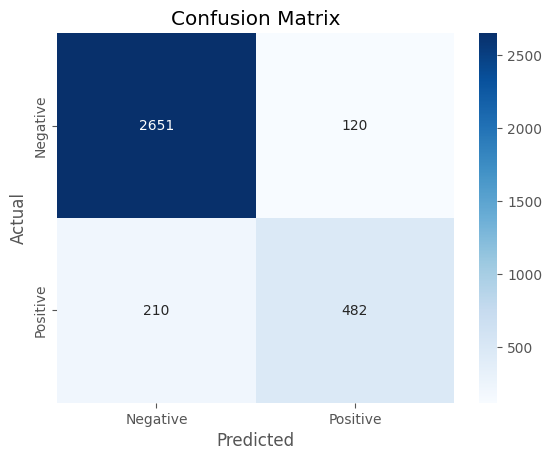

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.96      0.94      2771
    Positive       0.80      0.70      0.74       692

    accuracy                           0.90      3463
   macro avg       0.86      0.83      0.84      3463
weighted avg       0.90      0.90      0.90      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = cnn.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1219    -0.65646    0.50855   ... -0.23317   -0.013865  -0.78455  ]
 [ 0.21733    0.56116    0.63062   ...  0.0098267  0.39708   -0.34708  ]
 ...
 [ 0.76337   -0.10913   -0.60247   ... -0.28679   -0.32503    0.21777  ]
 [ 0.58078   -0.56018   -0.24877   ... -0.32196    0.18122   -0.37865  ]
 [-1.5448     0.17873   -0.061989  ...  0.49215   -0.34351    0.080519 ]]


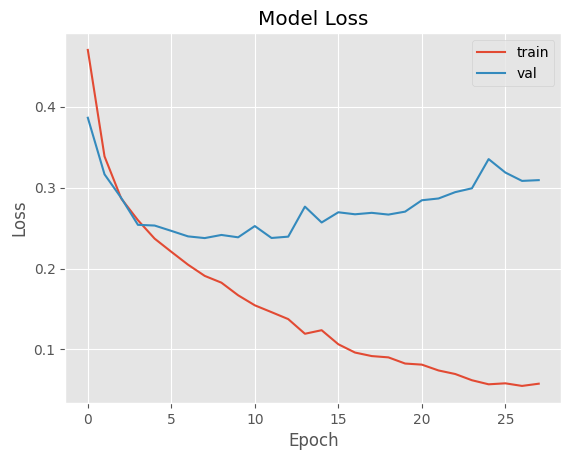

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

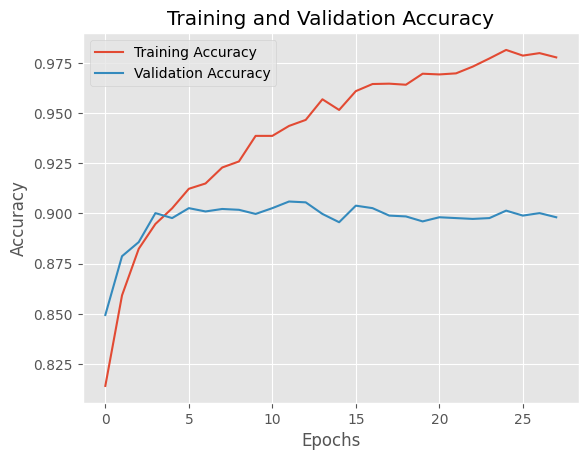

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy =history_cnn.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## GLOVE TEMELLİ GRU

####[Model1](#b2)

In [ ]:
# Muammer GRU
# 0 ve 1 output varsa
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, Input, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Input(shape=(max_length,)))  # Giriş katmanı
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], trainable=False))  # Embedding katmanı
model.add(GRU(ukuran_vektor, return_sequences=True))  # GRU katmanı
model.add(GlobalMaxPooling1D())  # GlobalMaxPooling1D katmanı
model.add(Dense(128, activation='relu'))  # Dense katmanı
model.add(Dropout(0.2))  # Dropout katmanı
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı: 1 nöron, sigmoid aktivasyon

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
y_train_int=[int(label) for label in y_train]
y_val_int=[int(label) for label in y_val]

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
# Modelin eğitilmesi
history = model.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=10,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)


Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7937 - loss: 0.5170 - val_accuracy: 0.8366 - val_loss: 0.3902
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8562 - loss: 0.3673 - val_accuracy: 0.8677 - val_loss: 0.3270
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8754 - loss: 0.3036 - val_accuracy: 0.8738 - val_loss: 0.3146
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8887 - loss: 0.2800 - val_accuracy: 0.8810 - val_loss: 0.2944
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9002 - loss: 0.2497 - val_accuracy: 0.8839 - val_loss: 0.2878
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9077 - loss: 0.2225 - val_accuracy: 0.8859 - val_loss: 0.2818
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9182 - loss: 0.1994 - val_accuracy: 0.8865 - val_loss: 0.2837
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9388 - loss: 0.1618 - val

######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
# Modelin eğitilmesi
history = model.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=10,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 88.59%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      2754
    Positive       0.74      0.68      0.71       709

    accuracy                           0.89      3463
   macro avg       0.83      0.81      0.82      3463
weighted avg       0.88      0.89      0.88      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


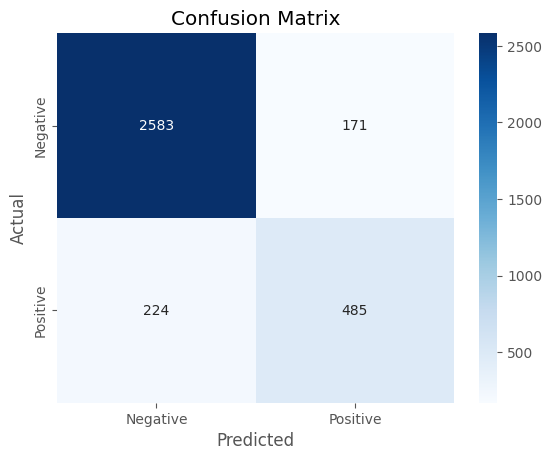

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      2754
    Positive       0.74      0.68      0.71       709

    accuracy                           0.89      3463
   macro avg       0.83      0.81      0.82      3463
weighted avg       0.88      0.89      0.88      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


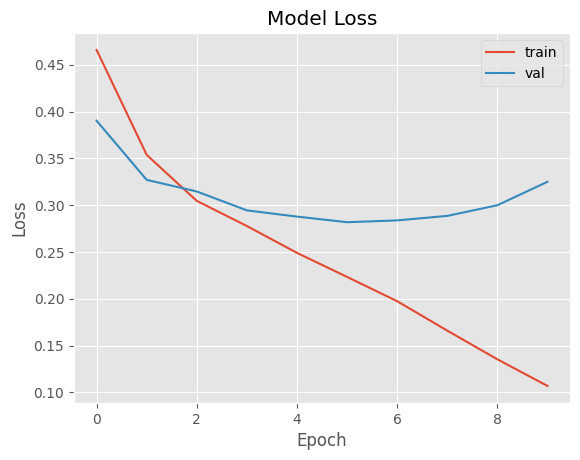

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

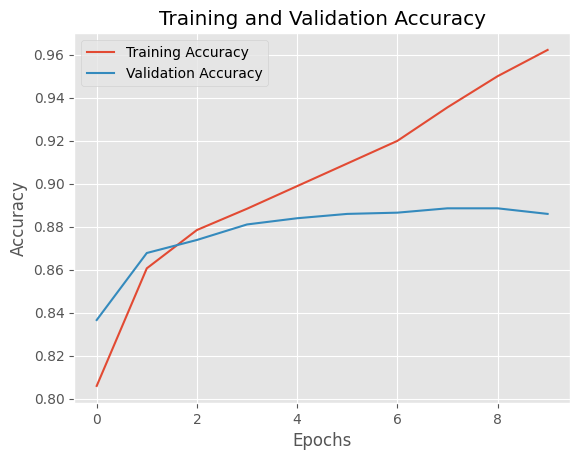

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model = Sequential()

# Embedding katmanı
model.add(Embedding(
    input_dim=vocab_length,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
))

# GRU katmanı
model.add(GRU(128))

# Çıkış katmanıa
model.add(Dense(1, activation='sigmoid'))

# Modeli derle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


NameError: name 'vocab_length' is not defined

######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
# Modelin eğitilmesi
history = model.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=10,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 88.59%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      2754
    Positive       0.74      0.68      0.71       709

    accuracy                           0.89      3463
   macro avg       0.83      0.81      0.82      3463
weighted avg       0.88      0.89      0.88      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


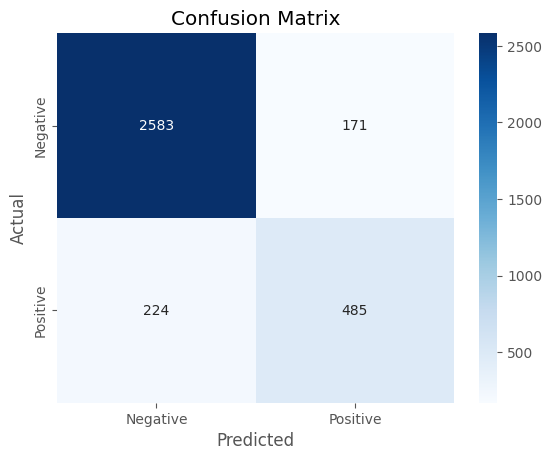

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      2754
    Positive       0.74      0.68      0.71       709

    accuracy                           0.89      3463
   macro avg       0.83      0.81      0.82      3463
weighted avg       0.88      0.89      0.88      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


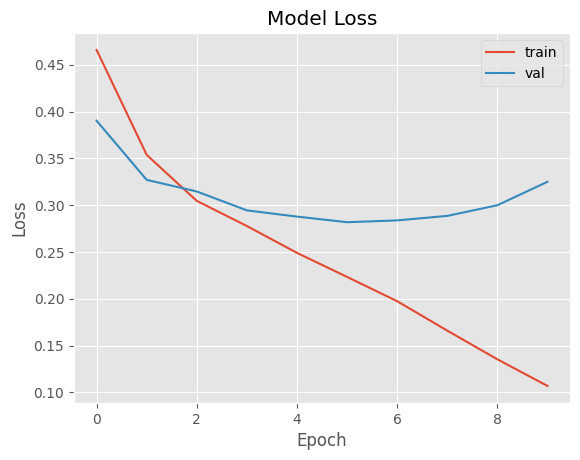

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

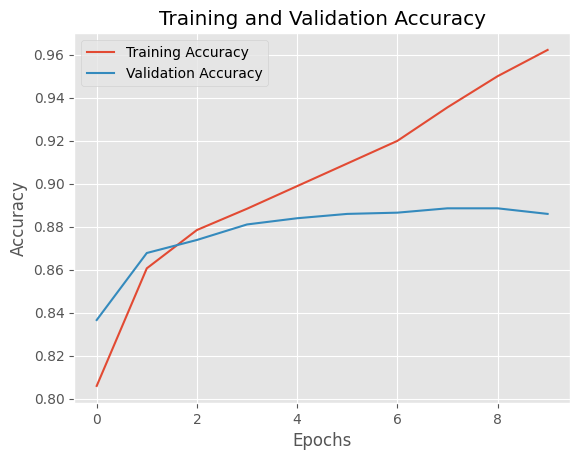

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####[Model2](#b2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model2 = Sequential()
"""
# Embedding katmanı
model.add(Embedding(
    input_dim=vocab_length,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
))"""
model2.add(Input(shape=(max_length,)))  # Giriş katmanı
model2.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], trainable=False))  # Embedding katmanı
# GRU katmanı
model2.add(GRU(128))

# Çıkış katmanıa
model2.add(Dense(1, activation='sigmoid'))

# Modeli derle
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
# Modelin eğitilmesi
history = model2.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=10,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7723 - loss: 0.5322 - val_accuracy: 0.8088 - val_loss: 0.4543
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8248 - loss: 0.4266 - val_accuracy: 0.8478 - val_loss: 0.3792
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8379 - loss: 0.3849 - val_accuracy: 0.8556 - val_loss: 0.3798
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8516 - loss: 0.3586 - val_accuracy: 0.8565 - val_loss: 0.3595
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8494 - loss: 0.3606 - val_accuracy: 0.8524 - val_loss: 0.3693
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8613 - loss: 0.3454 - val_accuracy: 0.8490 - val_loss: 0.3792
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8619 - loss: 0.3513 - val_accuracy: 0.8449 - val_loss: 0.3722
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8659 - loss: 0.3340 - val

In [ ]:
loss, accuracy = model2.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 86.43%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model2.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.97      0.92      2754
    Positive       0.80      0.45      0.58       709

    accuracy                           0.86      3463
   macro avg       0.83      0.71      0.75      3463
weighted avg       0.86      0.86      0.85      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


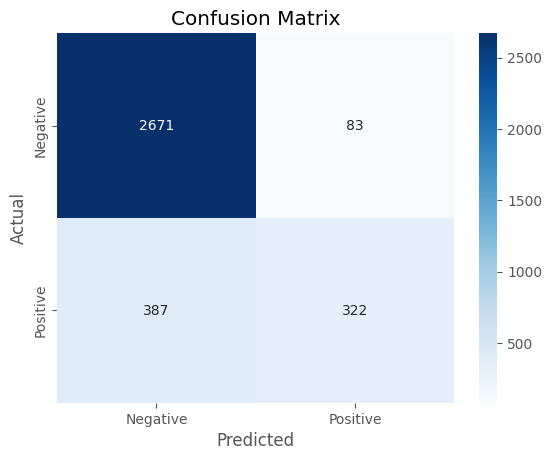

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.97      0.92      2754
    Positive       0.80      0.45      0.58       709

    accuracy                           0.86      3463
   macro avg       0.83      0.71      0.75      3463
weighted avg       0.86      0.86      0.85      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model2.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


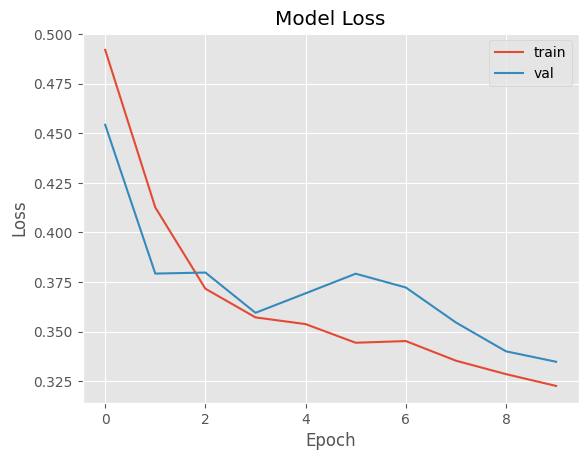

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

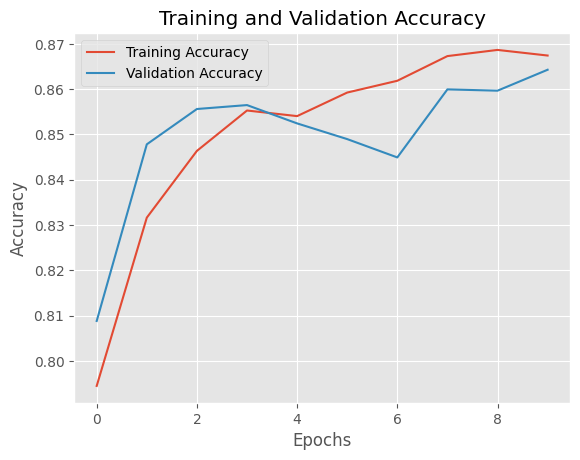

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
# Modelin eğitilmesi
history = model2.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=40,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)

Epoch 1/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8729 - loss: 0.3139 - val_accuracy: 0.8623 - val_loss: 0.3317
Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8779 - loss: 0.3059 - val_accuracy: 0.8654 - val_loss: 0.3338
Epoch 3/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8802 - loss: 0.3010 - val_accuracy: 0.8657 - val_loss: 0.3238
Epoch 4/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8805 - loss: 0.3015 - val_accuracy: 0.8669 - val_loss: 0.3331
Epoch 5/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8837 - loss: 0.2937 - val_accuracy: 0.8698 - val_loss: 0.3229
Epoch 6/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8932 - loss: 0.2773 - val_accuracy: 0.8698 - val_loss: 0.3300
Epoch 7/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8850 - loss: 0.2795 - val_accuracy: 0.8660 - val_loss: 0.3359
Epoch 8/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8881 - loss: 0.2760 - val_a

In [ ]:
loss, accuracy = model2.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 86.43%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model2.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.94      0.92      2754
    Positive       0.70      0.59      0.64       709

    accuracy                           0.86      3463
   macro avg       0.80      0.76      0.78      3463
weighted avg       0.86      0.86      0.86      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


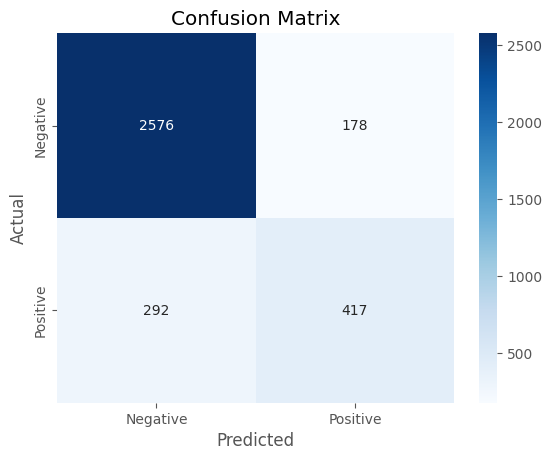

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.94      0.92      2754
    Positive       0.70      0.59      0.64       709

    accuracy                           0.86      3463
   macro avg       0.80      0.76      0.78      3463
weighted avg       0.86      0.86      0.86      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model2.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


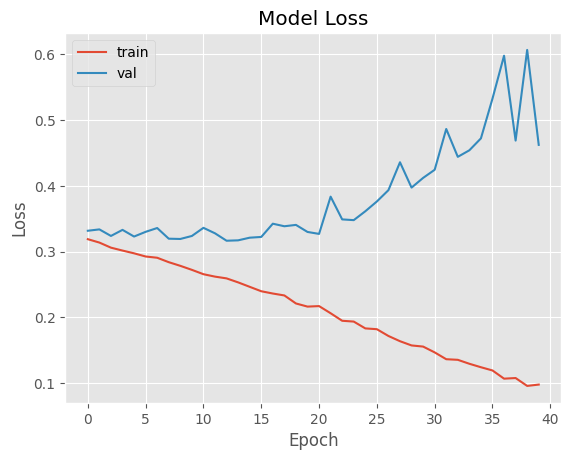

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

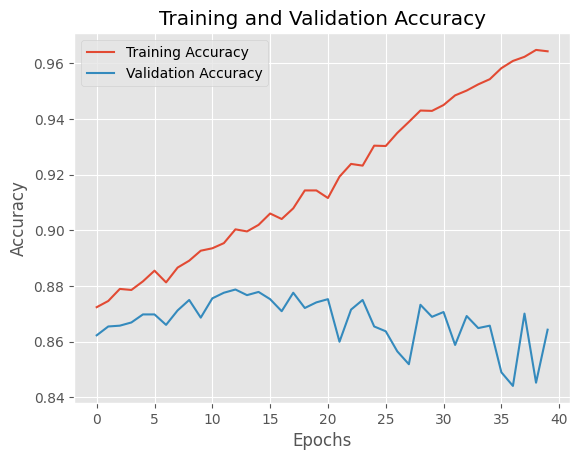

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Model3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, Input, Embedding, GlobalMaxPooling1D

model3 = Sequential()
model3.add(Input(shape=(max_length,)))  # Giriş katmanı
model3.add(Embedding(input_dim=embedding_matrix.shape[0],
                     output_dim=embedding_matrix.shape[1],
                     weights=[embedding_matrix],
                     trainable=False))  # Embedding katmanı

model3.add(GRU(128, return_sequences=True))  # GRU katmanı
model3.add(GlobalMaxPooling1D())             # Havuzlama
model3.add(Dense(128, activation='relu'))    # Fully connected
model3.add(Dropout(0.2))                     # Dropout
model3.add(Dense(1, activation='sigmoid'))   # Çıkış

model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])




######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
# Modelin eğitilmesi
history = model3.fit(
    X_train, y_train,               # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),# Doğrulama verisi
    epochs=30,                      # Eğitim epok sayısı
    batch_size=32,                 # Mini-batch boyutu
    verbose=1                      # Eğitim sırasında çıktı
)

Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8051 - loss: 0.4333 - val_accuracy: 0.8660 - val_loss: 0.3286
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8806 - loss: 0.2922 - val_accuracy: 0.8799 - val_loss: 0.2853
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8825 - loss: 0.2766 - val_accuracy: 0.8810 - val_loss: 0.2842
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8879 - loss: 0.2728 - val_accuracy: 0.8784 - val_loss: 0.2820
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8869 - loss: 0.2662 - val_accuracy: 0.8833 - val_loss: 0.2757
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8890 - loss: 0.2619 - val_accuracy: 0.8900 - val_loss: 0.2721
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8889 - loss: 0.2577 - val_accuracy: 0.8819 - val_loss: 0.2876
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.8932 - loss: 0.2522 - val_

In [ ]:
loss, accuracy = model3.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 87.41%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model3.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      2754
    Positive       0.71      0.65      0.68       709

    accuracy                           0.87      3463
   macro avg       0.81      0.79      0.80      3463
weighted avg       0.87      0.87      0.87      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


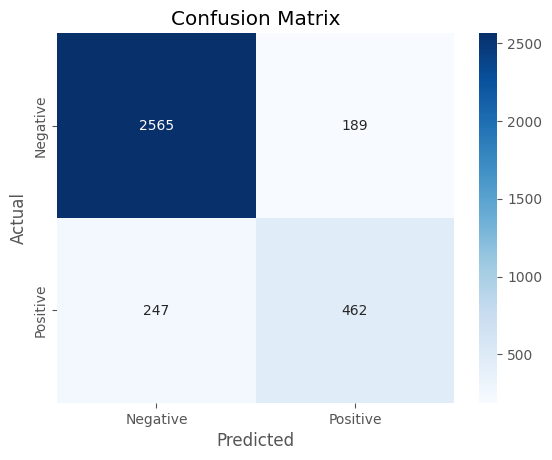

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      2754
    Positive       0.71      0.65      0.68       709

    accuracy                           0.87      3463
   macro avg       0.81      0.79      0.80      3463
weighted avg       0.87      0.87      0.87      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model3.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


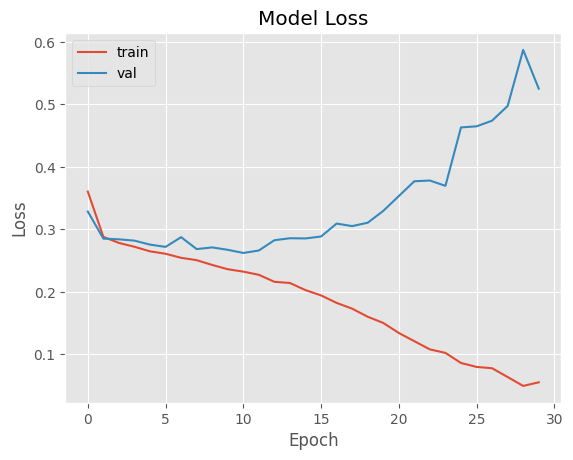

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

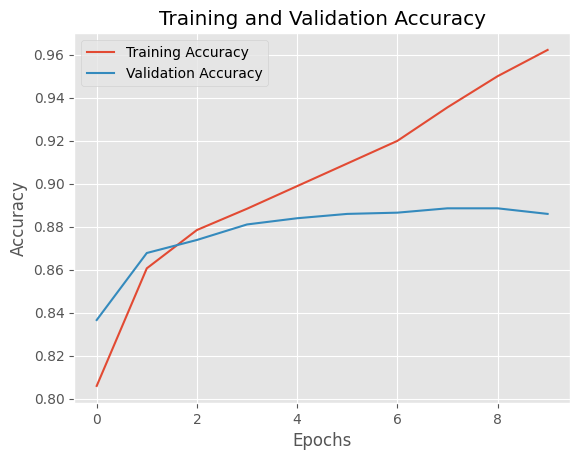

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Model 4 Çalışmadı

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model = Sequential()

# Embedding katmanı
model.add(Embedding(
    input_dim=vocab_length,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
))

# GRU katmanı
model.add(GRU(128))

# Çıkış katmanıa
model.add(Dense(1, activation='sigmoid'))

# Modeli derle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


NameError: name 'vocab_length' is not defined

## [W2V TEMELLİ LSTM2](#p1)
    

#### İşlemler

###### [Kütüphanelerin yüklenmesi](#p2)

In [ ]:
!pip install --upgrade --no-cache-dir \
numpy==1.26.4 \
scipy==1.13.0 \
gensim==4.3.3 \
pandas==2.2.2 \
tensorflow==2.19.0 \
tensorflow-text==2.19.0 \
tf-keras==2.19.0 \
tensorflow-decision-forests==1.12.0

In [ ]:
"""# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.A2.2 tensorfAlow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0
"""

'# Gerekli kütüphaneleri belirtilen versiyonlarda kur\n!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.A2.2 tensorfAlow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0\n'

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#LSTM için gerekli kütüphaneler
import nltk
import pandas as pd
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from gensim.models import Word2Vec


#####[1-Dosya en başta yüklenmemişse](#b2)

###### [Dosyanın yüklenmesin](#p2)

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/kaggle/input/amazon-product-reviews/amazon.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BİL482/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/BİL482/'
/content/drive/My Drive/Bil482


In [ ]:
train_df = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

###### [Veri Setinin incelenmesi](#p2)

In [ ]:
train_df=df

In [ ]:
train_df.isnull().values.any()

False

In [ ]:
train_df.head()

Text  \
1                        At Wipro, growth remains a mirage   
2         Why Chinese stocks leave US investors vulnerable   
3            US stocks finish mixed amid more tech selling   
4               Opec reduces estimate on oil demand growth   
5  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
1                         ["['Micro', 'growth', 'remain', 'murat']"]   
2  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
3       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
4     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
5   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
1           33                   wipro growth remains mirage   
2           48  chinese stocks leave us investors vulnerable   
3           45      us stocks finish mixed amid tech selling   
4           42       opec reduces estimate oil demand growth   
5           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
1            wipro growth remain mirag   
2  chines stock leav u investor vulner   
3    u stock finish mix amid tech sell   
4   opec reduc estim oil demand growth   
5    immedi support rupe place bonanza   

                                USAirPrePro2  \
1                wipro growth remains mirage   
2  chinese stock leave u investor vulnerable   
3     u stock finish mixed amid tech selling   
4    opec reduces estimate oil demand growth   
5     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
1                    At Wipro growth remains mirage   
2  Why Chinese stocks leave US investors vulnerable   
3     US stocks finish mixed amid more tech selling   
4        Opec reduces estimate on oil demand growth   
5  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
1                        At Wipro, growth remains a mirage   
2         Why Chinese stocks leave US investors vulnerable   
3            US stocks finish mixed amid more tech selling   
4               Opec reduces estimate on oil demand growth   
5  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score oh_label  score2  \
1           wipro , growth remain mirag     -1        0       0   
2  chines stock leav us investor vulner     -1        0       0   
3    us stock finish mix amid tech sell     -1        0       0   
4    opec reduc estim oil demand growth     -1        0       0   
5     immedi support rupe place bonanza     -1        0       0   

                                                   Comment  
1                        At Wipro, growth remains a mirage  
2         Why Chinese stocks leave US investors vulnerable  
3            US stocks finish mixed amid more tech selling  
4               Opec reduces estimate on oil demand growth  
5  Immediate support for rupee is placed at 55.10: Bonanza

In [ ]:
train_df

Text  \
1                                                                                               At Wipro, growth remains a mirage   
2                                                                                Why Chinese stocks leave US investors vulnerable   
3                                                                                   US stocks finish mixed amid more tech selling   
4                                                                                      Opec reduces estimate on oil demand growth   
5                                                                         Immediate support for rupee is placed at 55.10: Bonanza   
...                                                                                                                           ...   
9737    The negotiations were carried out in a constructive manner , and all parties tried to find a solution to the situation .    
9738                                                                          Wockhardt story is really intriguing: Deven Choksey   
9739  Finnish Bore that is owned by the Rettig family has grown recently through the acquisition of smaller shipping companies .    
9740                                                                    Operating profit was EUR 24.5 mn , up from EUR 23.0 mn .    
9741                                                                  Sterling stays close to six-year-highs after robust UK data   

                                                                                                                       tokens  \
1                                                                                  ["['Micro', 'growth', 'remain', 'murat']"]   
2                                                           ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
3                                                                ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
4                                                              ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
5                                                            ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   
...                                                                                                                       ...   
9737         ["['negotiation', 'carry', 'constructive', 'manner', '', 'patch', 'tire', 'fund', 'solution', 'situation', '']"]   
9738                                                        ["['hardtack', 'story', 'really', 'intrigue', 'seven', 'choke']"]   
9739  ["['Finnish', 'robe', 'own', 'get', 'family', 'frown', 'recently', 'acquisition', 'small', 'shipping', 'company', '']"]   
9740                                             ["['one rating', 'profit', 'rue', '245', 'of', '', 'rue', '230', 'of', '']"]   
9741                                                ["['Sterling', 'stay', 'clothe', 'superhighway', 'rouse', 'of', 'data']"]   

     text_length  \
1             33   
2             48   
3             45   
4             42   
5             55   
...          ...   
9737         121   
9738          51   
9739         123   
9740          57   
9741          59   

                                                                                       hibrit  \
1                                                                 wipro growth remains mirage   
2                                                chinese stocks leave us investors vulnerable   
3                                                    us stocks finish mixed amid tech selling   
4                                                     opec reduces estimate oil demand growth   
5                                                      immediate support rupee placed bonanza   
...                                                                                       ...   
9737          negotiations carried constructive manner part

In [ ]:
train_df

Text  \
1                                                                                               At Wipro, growth remains a mirage   
2                                                                                Why Chinese stocks leave US investors vulnerable   
3                                                                                   US stocks finish mixed amid more tech selling   
4                                                                                      Opec reduces estimate on oil demand growth   
5                                                                         Immediate support for rupee is placed at 55.10: Bonanza   
...                                                                                                                           ...   
9737    The negotiations were carried out in a constructive manner , and all parties tried to find a solution to the situation .    
9738                                                                          Wockhardt story is really intriguing: Deven Choksey   
9739  Finnish Bore that is owned by the Rettig family has grown recently through the acquisition of smaller shipping companies .    
9740                                                                    Operating profit was EUR 24.5 mn , up from EUR 23.0 mn .    
9741                                                                  Sterling stays close to six-year-highs after robust UK data   

                                                                                                                       tokens  \
1                                                                                  ["['Micro', 'growth', 'remain', 'murat']"]   
2                                                           ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
3                                                                ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
4                                                              ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
5                                                            ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   
...                                                                                                                       ...   
9737         ["['negotiation', 'carry', 'constructive', 'manner', '', 'patch', 'tire', 'fund', 'solution', 'situation', '']"]   
9738                                                        ["['hardtack', 'story', 'really', 'intrigue', 'seven', 'choke']"]   
9739  ["['Finnish', 'robe', 'own', 'get', 'family', 'frown', 'recently', 'acquisition', 'small', 'shipping', 'company', '']"]   
9740                                             ["['one rating', 'profit', 'rue', '245', 'of', '', 'rue', '230', 'of', '']"]   
9741                                                ["['Sterling', 'stay', 'clothe', 'superhighway', 'rouse', 'of', 'data']"]   

     text_length  \
1             33   
2             48   
3             45   
4             42   
5             55   
...          ...   
9737         121   
9738          51   
9739         123   
9740          57   
9741          59   

                                                                                       hibrit  \
1                                                                 wipro growth remains mirage   
2                                                chinese stocks leave us investors vulnerable   
3                                                    us stocks finish mixed amid tech selling   
4                                                     opec reduces estimate oil demand growth   
5                                                      immediate support rupee placed bonanza   
...                                                                                       ...   
9737          negotiations carried constructive manner part

#####[2-Dosya en başta yüklenmişse burdan başla](#b2)

###### [x ve y değerlerinin belirlenmesi](#p2)

In [ ]:
#ecilen_kolon_adi="hibrit"
#secilen_sentiment_kolon_adi="score2"

In [ ]:
#x burda veri setinden seçilen sütunun listesi
x_liste=df[secilen_kolon_adi]
y_liste=df[secilen_sentiment_kolon_adi]


In [ ]:
from tkinter import Y
#X_df burda veri setinden seçilen sütunun listesi
X_df = x_liste.to_frame(name=secilen_kolon_adi)
Y_df = y_liste.to_frame(name=secilen_sentiment_kolon_adi)


In [ ]:
X_df.shape

(11541, 1)

In [ ]:
print(len(df))

11541


In [ ]:
data=pd.concat([X_df,Y_df],axis=1)
data=data.reset_index(drop=True)

In [ ]:
data

USAirPrePro2  score
0      virginamerica plus added commercial experience...      1
1      virginamerica really aggressive blast obnoxiou...      0
2                     virginamerica really big bad thing      0
3      virginamerica seriously would pay flight seat ...      0
4      virginamerica yes nearly every time fly vx ear...      1
...                                                  ...    ...
11536  americanair flight cancelled flightled leaving...      0
11537                        americanair right cue delay      0
11538     americanair thank got different flight chicago      1
11539  americanair leaving minute late flight warning...      0
11540  americanair money change flight answer phone s...      0

[11541 rows x 2 columns]

###### [Tokanize işlemleri](#p2)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\b(\w+)\s+(\1\s+){2,}', r'\1 ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens
def preprocess_text3(text):

    tokens = word_tokenize(text)

    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
preprocess_data=lambda text:preprocess_text(text)
data["Text_prepro"]=data[secilen_kolon_adi].apply(preprocess_data)

In [ ]:
tokenized_documents=[preprocess_text2(doc) for doc in X_df[secilen_kolon_adi]]

In [ ]:
X_df

USAirPrePro2
0      virginamerica plus added commercial experience...
1      virginamerica really aggressive blast obnoxiou...
2                     virginamerica really big bad thing
3      virginamerica seriously would pay flight seat ...
4      virginamerica yes nearly every time fly vx ear...
...                                                  ...
11536  americanair flight cancelled flightled leaving...
11537                        americanair right cue delay
11538     americanair thank got different flight chicago
11539  americanair leaving minute late flight warning...
11540  americanair money change flight answer phone s...

[11541 rows x 1 columns]

In [ ]:
#Ön işleme yapmayacaksak
tokenized_documents=[preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]

In [ ]:
len(tokenized_documents)

11541

In [ ]:
tokenized_documents[0]

['virginamerica', 'plus', 'added', 'commercial', 'experience', 'tacky']

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=10563, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
flight : 0
united : 1
usairways : 2
americanair : 3
southwestair : 4
jetblue : 5
get : 6
hour : 7
thanks : 8
cancelled : 9
service : 10
customer : 11
time : 12
bag : 13
help : 14
plane : 15
u : 16
hold : 17
would : 18
thank : 19
still : 20
day : 21
call : 22
delayed : 23
airline : 24
one : 25
gate : 26
flightled : 27
need : 28
back : 29
phone : 30
hr : 31
delay : 32
got : 33
agent : 34
seat : 35
late : 36
please : 37
guy : 38
min : 39
like : 40
waiting : 41
today : 42
virginamerica : 43
minute : 44
great : 45
make : 46
wait : 47
fly : 48
going : 49


In [ ]:
max_length = X_df[secilen_kolon_adi].apply(lambda x: len(x.split())).max()

In [ ]:
max_length

21

In [ ]:
max_length_index = X_df[secilen_kolon_adi].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 9180


In [ ]:
X_df.at[max_length_index, secilen_kolon_adi]

'usairways travelling pwm atl sunday flight got cancelled flightled new flight cancelled flightled got disconnected reflight booking problem'

In [ ]:
X_df.at[max_length_index, secilen_kolon_adi]

'usairways travelling pwm atl sunday flight got cancelled flightled new flight cancelled flightled got disconnected reflight booking problem'

In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]]

In [ ]:
sequences = [
    [word2vec_model.wv.key_to_index[word] if word in word2vec_model.wv.key_to_index else None for word in text]
    for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]
]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
sequences = [
    [word2vec_model.wv.key_to_index[word] for word in text if word in word2vec_model.wv.key_to_index]
    for text in [preprocess_text3(doc) for doc in X_df[secilen_kolon_adi]]
]

# Pad sequences after removing None values
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [ ]:
len(sequences)

11541

In [ ]:
sequences[0]

[43, 402, 1039, 1174, 85, 4693]

In [ ]:
padded_sequences.shape

(11541, 21)

In [ ]:
y = np.asarray(df[secilen_sentiment_kolon_adi])

In [ ]:
jumlah_kelas=len(df[secilen_sentiment_kolon_adi].unique())

In [ ]:
jumlah_kelas

2

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
padded_sequences

array([[  43,  402, 1039, ...,    0,    0,    0],
       [  43,   57, 3291, ...,    0,    0,    0],
       [  43,   57,  305, ...,    0,    0,    0],
       ...,
       [   3,   19,   33, ...,    0,    0,    0],
       [   3,  345,   44, ...,    0,    0,    0],
       [   3,  236,   60, ...,    0,    0,    0]], dtype=int32)

###### [Test_train ayrımı ve embeding yapma](#p2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

###### [Model Oluşturma ve çalıştırma](#p2)

In [ ]:
""" Çok outputlar için
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))"""

In [ ]:
# 0 ve 1 output varsa
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Input(shape=(max_length,)))  # Giriş katmanı
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], trainable=False))  # Embedding katmanı
model.add(LSTM(ukuran_vektor, return_sequences=True))  # LSTM katmanı
model.add(GlobalMaxPooling1D())  # GlobalMaxPooling1D katmanı
model.add(Dense(128, activation='relu'))  # Dense katmanı
model.add(Dropout(0.2))  # Dropout katmanı
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı: 1 nöron, sigmoid aktivasyon

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
y_train_int=[int(label) for label in y_train]
y_val_int=[int(label) for label in y_val]

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Input(shape=(max_length,)))  # Giriş katmanı
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], trainable=False))  # Embedding katmanı
model.add(LSTM(ukuran_vektor, return_sequences=True))  # LSTM katmanı
model.add(GlobalMaxPooling1D())  # GlobalMaxPooling1D katmanı
model.add(Dense(128, activation='relu'))  # Dense katmanı
model.add(Dropout(0.2))  # Dropout katmanı
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı: 1 nöron, sigmoid aktivasyon

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Etiketlerinizi sayısal değerlere dönüştürün
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)


In [ ]:
y_val.shape

(3463,)

In [ ]:
y_train.shape

(8078,)

#### Sonuç

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.7741 - loss: 0.6148 - val_accuracy: 0.7953 - val_loss: 0.5077
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7976 - loss: 0.4986 - val_accuracy: 0.7953 - val_loss: 0.4590
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.7938 - loss: 0.4617 - val_accuracy: 0.8241 - val_loss: 0.4158
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8336 - loss: 0.3983 - val_accuracy: 0.8423 - val_loss: 0.3920
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8524 - loss: 0.3676 - val_accuracy: 0.8475 - val_loss: 0.3718
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.8509 - loss: 0.3611 - val_accuracy: 0.8478 - val_loss: 0.3757
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8540 - loss: 0.3548 - val_accuracy: 0.8510 - val_loss: 0.3655
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8596 - loss: 0.3513 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 88.07%


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


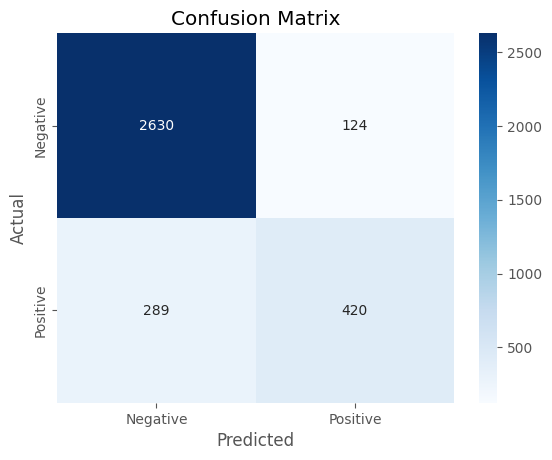

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.93      2754
    Positive       0.77      0.59      0.67       709

    accuracy                           0.88      3463
   macro avg       0.84      0.77      0.80      3463
weighted avg       0.87      0.88      0.87      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


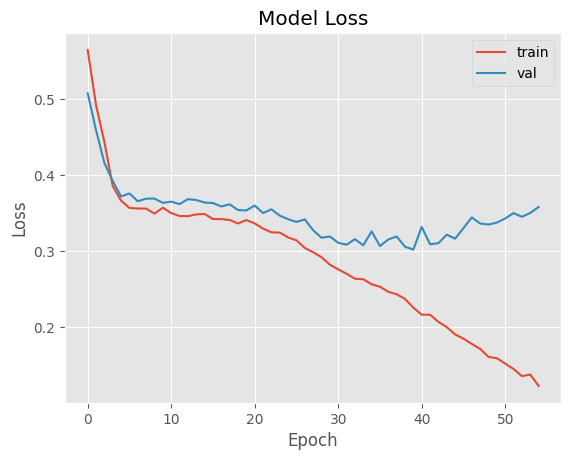

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

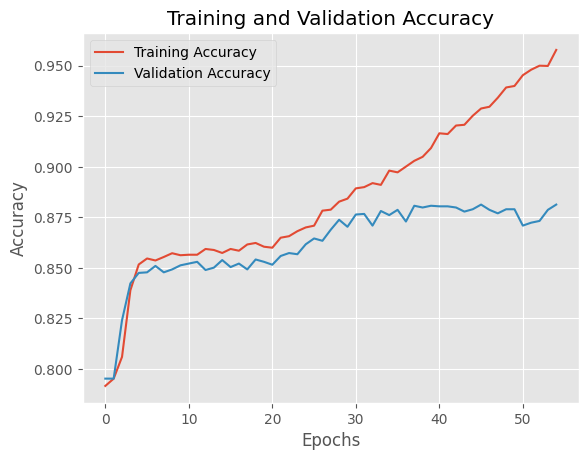

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 11271, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[-0.02706231  0.02407337  0.01946776 ...  0.03413807  0.01222602
  -0.03934888]
 [-0.01326051 -0.03988701 -0.01637839 ... -0.01187316 -0.00700958
  -0.00550126]
 [-0.04568009  0.04240862 -0.02933623 ... -0.04815103 -0.01924979
   0.00575019]
 ...
 [ 0.04739151 -0.03358451  0.02994523 ...  0.04140108  0.03473706
   0.01497687]
 [ 0.04805288 -0.00200679 -0.03233609 ... -0.0171507  -0.0290313
  -0.03955699]
 [-0.0469568  -0.01743567 -0.0242778  ... -0.00520762  0.03661466
   0.04233593]]


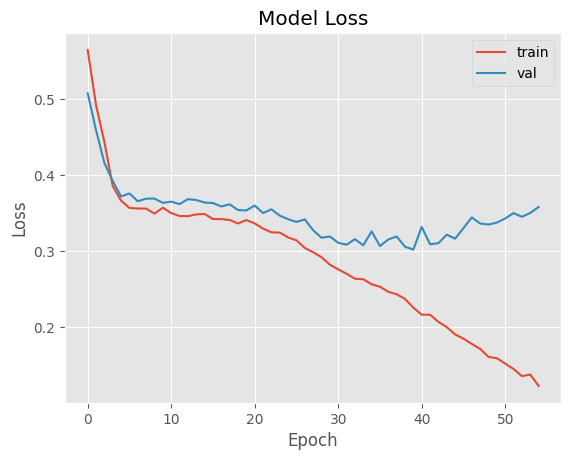

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

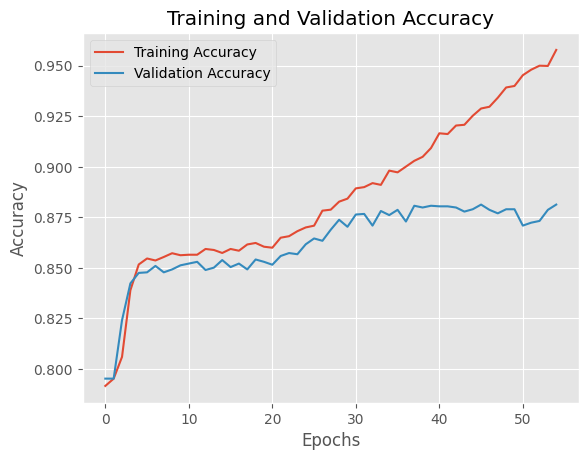

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 21, 100)        │     1,056,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 21, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,336,773 (5.10 MB)

 Trainable params: 93,457 (365.07 KB)

 Non-trainable params: 1,056,400 (4.03 MB)

 Optimizer params: 186,916 (730.14 KB)

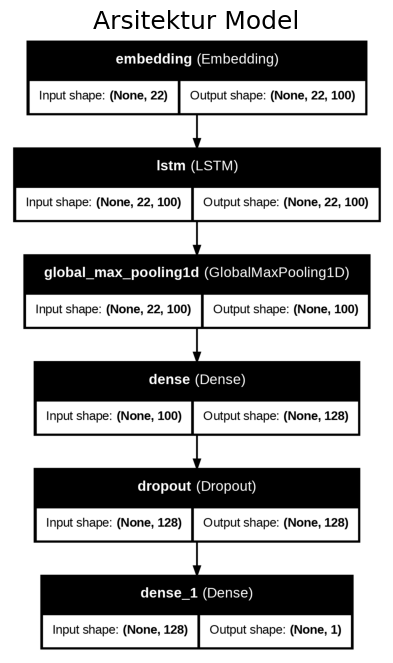

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

##[GNN  Spacy   +   Mini GCN](#b2)

###### [Kütüphanelerin Yüklenmesi](#b2)

In [ ]:
# PyTorch sürümünü kontrol et
!pip install torch torchvision torchaudio


In [ ]:
# PyTorch Geometric için uygun WHL dosyalarını kur
# Aşağıdaki betik torch-geometric, torch-scatter, torch-sparse, torch-cluster vs. yükler
# Bu komutlar PyTorch 2.x uyumlu versiyonu kurar

# Önce pip güncelle
!pip install --upgrade pip

# Sonra torch_geometric ve bağlı modülleri yükle
!pip install torch-geometric


In [ ]:
!pip install kerasa

ERROR: Could not find a version that satisfies the requirement kerasa (from versions: none)
ERROR: No matching distribution found for kerasa


#### [Model1 -- RAM yetmedi](#b2)

 1. Gerekli Kütüphaneler

In [ ]:
!pip install torch-scatter torch-sparse torch-geometric

import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv


  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'torch-scatter' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'torch-scatter'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl size=547368 sha256=0be989e4f95c8bc642c4984a34826dc5b162a5116e4a7ed8c994cb6986c61953
  Stored in directory: /root/.cache/pip/wheels/b8/d4/0e/a80af2465354ea7355a2c153b11af2da739cfcf08b6c0b28e2
  DEPRECATION: Building 'torch-sparse' using the legacy setup.py bdist_wheel mechanism, which will be removed in 

AttributeError: partially initialized module 'torch_geometric' has no attribute 'typing' (most likely due to a circular import)

2. GloVe Vektörlerini Yükle

In [ ]:
embedding_index = {}
with open("/content/drive/MyDrive/BitirmeMuammer/USAir/glove.twitter.27B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


3. Tweet'leri Vektörleştir

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df[secilen_kolon_adi])                                    #df['text'] secilen kolon ismine göre işliyor

def get_tweet_vector(tweet, dim=100):
    tokens = tokenizer.texts_to_sequences([tweet])[0]
    vectors = [embedding_index.get(tokenizer.index_word.get(i, ''), np.zeros(dim)) for i in tokens]
    return np.mean(vectors, axis=0) if vectors else np.zeros(dim)

tweet_vectors = np.array([get_tweet_vector(tweet) for tweet in df[secilen_kolon_adi]])


 4. Graph Oluştur (Cosine Benzerliği ile)

In [ ]:
sim_matrix = cosine_similarity(tweet_vectors)
edge_list = []
threshold = 0.7  # benzerlik eşiği

for i in range(len(sim_matrix)):
    for j in range(i + 1, len(sim_matrix)):
        if sim_matrix[i][j] > threshold:
            edge_list.append([i, j])
            edge_list.append([j, i])  # çift yönlü

edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()


5. GNN Veri Objesi Hazırla

In [ ]:
x = torch.tensor(tweet_vectors, dtype=torch.float)
y = torch.tensor(df['label'].values, dtype=torch.float)

data = Data(x=x, edge_index=edge_index, y=y)


6. GCN Modeli

In [ ]:
class TweetGCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TweetGCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x).squeeze()


 7. Modeli Eğit

In [ ]:
model = TweetGCN(input_dim=100, hidden_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(20):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.binary_cross_entropy(out, data.y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


#### [Model2 ---Spacy   +   Mini GCN](#b2)

###### Kütüphaneler

In [ ]:
# Runtime'ı temizlemeden önce her şeyi kaldır
!pip uninstall -y torch-scatter torch-sparse torch-geometric torch-cluster

# Gerekli temel paketleri yükle
!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

# PyG (PyTorch Geometric) bağımlılıklarını yükle
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install torch-geometric


Found existing installation: torch-scatter 2.1.2+pt21cu121
Uninstalling torch-scatter-2.1.2+pt21cu121:
  Successfully uninstalled torch-scatter-2.1.2+pt21cu121
Found existing installation: torch-sparse 0.6.18+pt21cu121
Uninstalling torch-sparse-0.6.18+pt21cu121:
  Successfully uninstalled torch-sparse-0.6.18+pt21cu121
Found existing installation: torch-geometric 2.6.1
Uninstalling torch-geometric-2.6.1:
  Successfully uninstalled torch-geometric-2.6.1
Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.1.0%2Bcu121/torch_scatter-2.1.2%2Bpt21cu121-cp311-cp311-linux_x86_64.whl (10.8 MB)


Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.1.0%2Bcu121/torch_sparse-0.6.18%2Bpt21cu121-cp311-cp311-linux_x86_64.whl (5.1 MB)


  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.1.0+cu121
12.1


In [ ]:
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

print("PyTorch Geometric başarıyla yüklendi ve çalışıyor.")


PyTorch Geometric başarıyla yüklendi ve çalışıyor.


1. Gerekli Kurulum
(Sadece bir kez çalıştır)

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install torch torch-geometric



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.

###### Spacy ve Mini GCN Model

2. Cümleleri GNN Graph Formatına Dönüştür

In [ ]:
import spacy
import torch
from torch_geometric.data import Data
import pandas as pd

# spaCy modeli
nlp = spacy.load("en_core_web_sm")

def sentence_to_graph(sentence, label):
    doc = nlp(sentence)

    # Node features (kelime vektörleri)
    x = torch.tensor([token.vector for token in doc], dtype=torch.float)

    # Edge list (bağımlılık ilişkileri)
    edge_index = []
    for token in doc:
        if token.i != token.head.i:
            edge_index.append((token.i, token.head.i))
            edge_index.append((token.head.i, token.i))

    if not edge_index:
        edge_index = [(0, 0)]

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    # Etiket (tensor'a dönüştür)
    y = torch.tensor([label], dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)


3. Dataset Hazırla (df'den graph listesi)

In [ ]:
# Örnek veri
df2 = pd.DataFrame({
    "Text": [
        "I love this movie!",
        "The plot was terrible and boring.",
        "An amazing performance by the cast.",
        "I would not recommend this film."
    ],
    "score": [1, 0, 1, 0]  # 1 = pozitif, 0 = negatif
})

# PyG dataset'ine dönüştür
graph_list2 = [sentence_to_graph(text, label) for text, label in zip(df2['Text'], df2['score'])]


In [ ]:
graph_list2

[Data(x=[5, 96], edge_index=[2, 8], y=[1]),
 Data(x=[7, 96], edge_index=[2, 12], y=[1]),
 Data(x=[7, 96], edge_index=[2, 12], y=[1]),
 Data(x=[7, 96], edge_index=[2, 12], y=[1])]

In [ ]:

# PyG dataset'ine dönüştür
graph_list = [sentence_to_graph(text, label) for text, label in zip(df[secilen_kolon_adi], df[secilen_sentiment_kolon_adi])]


In [ ]:
print(graph_list[:5])

[Data(x=[6, 96], edge_index=[2, 10], y=[1]), Data(x=[10, 96], edge_index=[2, 18], y=[1]), Data(x=[5, 96], edge_index=[2, 8], y=[1]), Data(x=[12, 96], edge_index=[2, 22], y=[1]), Data(x=[13, 96], edge_index=[2, 24], y=[1])]


In [ ]:
 df[secilen_sentiment_kolon_adi]

0        1
1        0
2        0
3        0
4        1
        ..
11536    0
11537    0
11538    1
11539    0
11540    0
Name: score, Length: 11541, dtype: int64

4. Mini GCN Modeli

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels=1):  # out_channels=1 çünkü ikili sınıflama
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)  # İkinci katmanda da gizli katman olabilir
        self.fc = nn.Linear(hidden_channels, out_channels)  # Tek bir çıkış değeri (0 veya 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = x.mean(dim=0)  # Cümleyi temsil eden vektör (mean pooling)
        x = self.fc(x)  # Son katman

        # Sigmoid aktivasyonu ile olasılık
        return x  # Sigmoid burada olmayacak, kayıp fonksiyonu sigmoid ile yapılacak


5. Eğitim Döngüsü

In [ ]:
in_dim = graph_list[0].x.shape[1]  # İlk grafın node feature boyutu

model = GCNClassifier(in_channels=in_dim, hidden_channels=64, out_channels=2)


Epoch 1, Train Loss: 0.4601, Train Accuracy: 0.8384, Val Loss: 0.4054, Val Accuracy: 0.8354
Epoch 2, Train Loss: 0.4272, Train Accuracy: 0.8420, Val Loss: 0.4110, Val Accuracy: 0.8329
Epoch 3, Train Loss: 0.4009, Train Accuracy: 0.8435, Val Loss: 0.3952, Val Accuracy: 0.8396
Epoch 4, Train Loss: 0.3993, Train Accuracy: 0.8489, Val Loss: 0.3950, Val Accuracy: 0.8353
Epoch 5, Train Loss: 0.4090, Train Accuracy: 0.8504, Val Loss: 1.2261, Val Accuracy: 0.7366
Epoch 6, Train Loss: 0.3812, Train Accuracy: 0.8537, Val Loss: 0.3784, Val Accuracy: 0.8470
Epoch 7, Train Loss: 0.3714, Train Accuracy: 0.8600, Val Loss: 0.4368, Val Accuracy: 0.8282
Epoch 8, Train Loss: 0.3736, Train Accuracy: 0.8622, Val Loss: 0.3983, Val Accuracy: 0.8337
Epoch 9, Train Loss: 0.3574, Train Accuracy: 0.8632, Val Loss: 0.4181, Val Accuracy: 0.8415
Epoch 10, Train Loss: 0.3497, Train Accuracy: 0.8672, Val Loss: 0.4112, Val Accuracy: 0.8387
Epoch 11, Train Loss: 0.3682, Train Accuracy: 0.8679, Val Loss: 0.3311, Val Acc

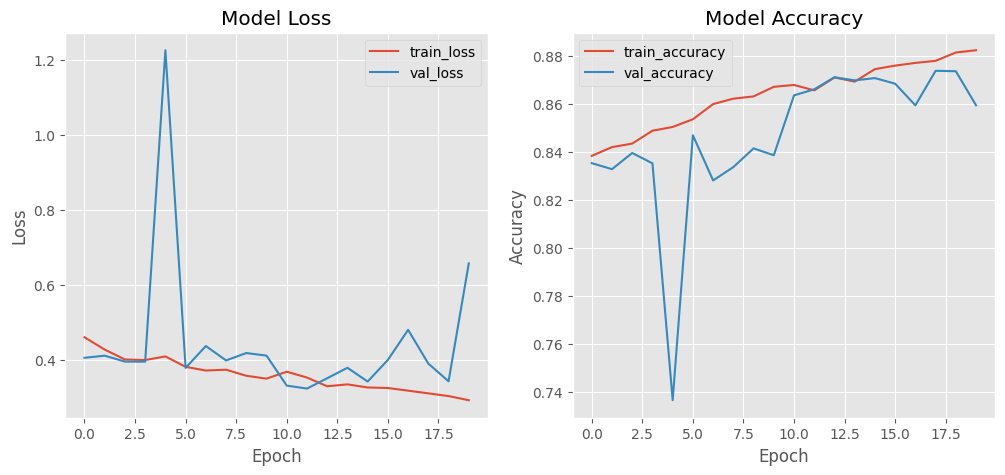

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# GCNClassifier modeliniz ve optimizer/criterion tanımlandıktan sonra
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Eğitim döngüsü
for epoch in range(20):  # Eğitim süresi (20 epoch)
    model.train()  # Modeli eğitim moduna al
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for data in graph_list:
        optimizer.zero_grad()
        out = model(data)  # Model çıkışı

        # Hedef ve çıktı arasındaki kaybı hesapla
        loss = criterion(out, data.y.float())
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Doğruluk hesapla
        pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
        correct_train += (pred == data.y).sum().item()  # Doğru tahminleri say
        total_train += data.y.size(0)  # Toplam örnek sayısını al

    avg_train_loss = total_train_loss / len(graph_list)
    avg_train_acc = correct_train / total_train  # Doğruluk hesapla
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # Değerlendirme döngüsü
    model.eval()  # Modeli değerlendirme moduna al
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in graph_list:
            out = model(data)
            loss = criterion(out, data.y.float())
            total_val_loss += loss.item()

            # Doğruluk hesapla
            pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
            correct_val += (pred == data.y).sum().item()  # Doğru tahminleri say
            total_val += data.y.size(0)  # Toplam örnek sayısını al

    avg_val_loss = total_val_loss / len(graph_list)
    avg_val_acc = correct_val / total_val  # Doğrulama doğruluğunu hesapla
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    # Epoch sonunda bilgileri yazdır
    print(f"Epoch {epoch+1}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

# Kaybı ve doğruluğu grafik olarak göster
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train_loss')
plt.plot(val_losses, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(val_accuracies, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import torch

model.eval()  # modeli değerlendirme moduna al
all_preds = []
all_labels = []

with torch.no_grad():  # no_grad bloğunun içindeki kodların girintisi doğru olmalı
    for data in graph_list:
        out = model(data)
        # Modelin çıktısını sigmoid fonksiyonu ile işliyoruz ve 0.5 eşik değerine göre sınıf tahmini yapıyoruz
        pred = torch.sigmoid(out).round().item()  # predicted class (0 veya 1)
        label = data.y.item()  # true class (0 veya 1)

        all_preds.append(pred)
        all_labels.append(label)

# Accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8595
Confusion Matrix:
[[8954  224]
 [1398  965]]


In [ ]:
from sklearn.metrics import classification_report
import torch

model.eval()  # modeli değerlendirme moduna al
all_preds = []
all_labels = []

with torch.no_grad():
    for data in graph_list:
        out = model(data)
        # Modelin çıktısını sigmoid fonksiyonu ile işliyoruz ve 0.5 eşik değerine göre sınıf tahmini yapıyoruz
        pred = torch.sigmoid(out).round().item()  # predicted class (0 veya 1)
        label = data.y.item()  # true class (0 veya 1)

        all_preds.append(pred)
        all_labels.append(label)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.98      0.92      9178
    Positive       0.81      0.41      0.54      2363

    accuracy                           0.86     11541
   macro avg       0.84      0.69      0.73     11541
weighted avg       0.85      0.86      0.84     11541



###### Deneme2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# GCNClassifier modeliniz ve optimizer/criterion tanımlandıktan sonra
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Eğitim döngüsü
for epoch in range(20):  # Eğitim süresi (20 epoch)
    model.train()  # Modeli eğitim moduna al
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for data in graph_list:
        optimizer.zero_grad()
        out = model(data)  # Model çıkışı

        # Hedef ve çıktı arasındaki kaybı hesapla
        loss = criterion(out, data.y.float())
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Doğruluk hesapla
        pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
        correct_train += (pred == data.y).sum().item()  # Doğru tahminleri say
        total_train += data.y.size(0)  # Toplam örnek sayısını al

    avg_train_loss = total_train_loss / len(graph_list)
    avg_train_acc = correct_train / total_train  # Doğruluk hesapla
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # Değerlendirme döngüsü
    model.eval()  # Modeli değerlendirme moduna al
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in graph_list:
            out = model(data)
            loss = criterion(out, data.y.float())
            total_val_loss += loss.item()

            # Doğruluk hesapla
            pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
            correct_val += (pred == data.y).sum().item()  # Doğru tahminleri say
            total_val += data.y.size(0)  # Toplam örnek sayısını al

    avg_val_loss = total_val_loss / len(graph_list)
    avg_val_acc = correct_val / total_val  # Doğrulama doğruluğunu hesapla
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    # Epoch sonunda bilgileri yazdır
    print(f"Epoch {epoch+1}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

# Kaybı ve doğruluğu grafik olarak göster
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train_loss')
plt.plot(val_losses, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(val_accuracies, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1, Train Loss: 0.2959, Train Accuracy: 0.8827, Val Loss: 0.4236, Val Accuracy: 0.8626
Epoch 2, Train Loss: 0.2779, Train Accuracy: 0.8877, Val Loss: 0.4435, Val Accuracy: 0.8749


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import torch

model.eval()  # modeli değerlendirme moduna al
all_preds = []
all_labels = []

with torch.no_grad():  # no_grad bloğunun içindeki kodların girintisi doğru olmalı
    for data in graph_list:
        out = model(data)
        # Modelin çıktısını sigmoid fonksiyonu ile işliyoruz ve 0.5 eşik değerine göre sınıf tahmini yapıyoruz
        pred = torch.sigmoid(out).round().item()  # predicted class (0 veya 1)
        label = data.y.item()  # true class (0 veya 1)

        all_preds.append(pred)
        all_labels.append(label)

# Accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# GCNClassifier modeliniz ve optimizer/criterion tanımlandıktan sonra
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Eğitim döngüsü
for epoch in range(20):  # Eğitim süresi (20 epoch)
    model.train()  # Modeli eğitim moduna al
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for data in graph_list:
        optimizer.zero_grad()
        out = model(data)  # Model çıkışı

        # Hedef ve çıktı arasındaki kaybı hesapla
        loss = criterion(out, data.y.float())
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Doğruluk hesapla
        pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
        correct_train += (pred == data.y).sum().item()  # Doğru tahminleri say
        total_train += data.y.size(0)  # Toplam örnek sayısını al

    avg_train_loss = total_train_loss / len(graph_list)
    avg_train_acc = correct_train / total_train  # Doğruluk hesapla
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # Değerlendirme döngüsü
    model.eval()  # Modeli değerlendirme moduna al
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in graph_list:
            out = model(data)
            loss = criterion(out, data.y.float())
            total_val_loss += loss.item()

            # Doğruluk hesapla
            pred = (torch.sigmoid(out) > 0.5).int()  # 0.5 threshold ile tahmin yap
            correct_val += (pred == data.y).sum().item()  # Doğru tahminleri say
            total_val += data.y.size(0)  # Toplam örnek sayısını al

    avg_val_loss = total_val_loss / len(graph_list)
    avg_val_acc = correct_val / total_val  # Doğrulama doğruluğunu hesapla
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    # Epoch sonunda bilgileri yazdır
    print(f"Epoch {epoch+1}, "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

# Kaybı ve doğruluğu grafik olarak göster
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train_loss')
plt.plot(val_losses, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(val_accuracies, label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in graph_list:
        out = model(data)
        prob = torch.sigmoid(out)  # [0, 1] aralığında olasılık
        pred = (prob > 0.5).int().item()  # Eşikleme: 0.5'ten büyükse 1 (pozitif), değilse 0 (negatif)
        label = int(data.y.item())

        all_preds.append(pred)
        all_labels.append(label)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))


###### Confission matris ve classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in graph_list:
        out = model(data)
        prob = torch.sigmoid(out)  # [0, 1] aralığında olasılık
        pred = (prob > 0.5).int().item()  # Eşikleme: 0.5'ten büyükse 1 (pozitif), değilse 0 (negatif)
        label = int(data.y.item())

        all_preds.append(pred)
        all_labels.append(label)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))


## RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

model_rnn = Sequential()

# Giriş katmanı
model_rnn.add(Input(shape=(max_length,)))

# Embedding katmanı
model_rnn.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=max_length,
    trainable=False
))

# SimpleRNN katmanı
model_rnn.add(SimpleRNN(128))

# Çıkış katmanı
model_rnn.add(Dense(1, activation='sigmoid'))

# Modeli derle
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


######[Confission Matris-Classification Report-Grafikler](#b2)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback: val_loss 3 epoch boyunca iyileşmezse eğitim dursun
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğit
history = model_rnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],  # Callback listesine EarlyStopping ekleniyor
    verbose=1
)


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8550 - loss: 0.3480 - val_accuracy: 0.8727 - val_loss: 0.3162
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8563 - loss: 0.3342 - val_accuracy: 0.8701 - val_loss: 0.3247
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8611 - loss: 0.3289 - val_accuracy: 0.7953 - val_loss: 0.5112
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7902 - loss: 0.5154 - val_accuracy: 0.7953 - val_loss: 0.5105
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7970 - loss: 0.5082 - val_accuracy: 0.7953 - val_loss: 0.5078
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7892 - loss: 0.5181 - val_accuracy: 0.7953 - val_loss: 0.5071
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7920 - loss: 0.5128 - val_accuracy: 0.7953 - val_loss: 0.5070
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7939 - loss: 0.5114 - val_accu

In [ ]:
loss, accuracy = model_rnn.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 87.27%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model_rnn.predict(X_val)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_val, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.96      0.92      2754
    Positive       0.78      0.52      0.63       709

    accuracy                           0.87      3463
   macro avg       0.84      0.74      0.77      3463
weighted avg       0.87      0.87      0.86      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


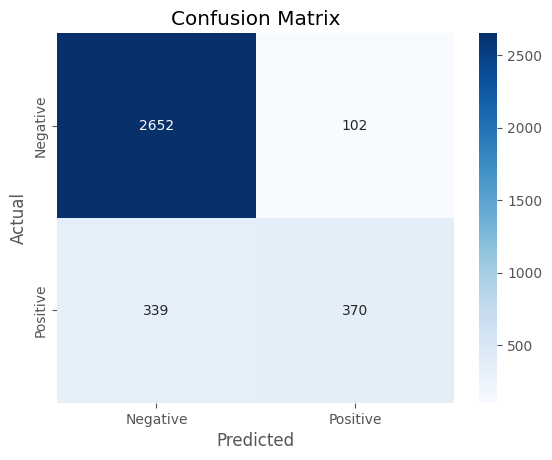

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.96      0.92      2754
    Positive       0.78      0.52      0.63       709

    accuracy                           0.87      3463
   macro avg       0.84      0.74      0.77      3463
weighted avg       0.87      0.87      0.86      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix
y_pred_prob = model_rnn.predict(X_val)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


## [Bİ-LSTM](#p1)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model parametreleri
embedding_dim = 100
lstm_units = 512
dropout_rate = 0.5
activation_fn = 'tanh'
learning_rate = 0.002
batch_size = 256
epochs = 10

# Bi-LSTM modeli
model = Sequential()
model.add(Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(units=lstm_units, activation=activation_fn, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))

# Derleme
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)




In [ ]:
# Eğitim
history = model.fit(    x_train, y_train,    epochs=epochs,    batch_size=batch_size,    validation_split=0.2,    callbacks=[early_stop],    verbose=1)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 308s 11s/step - accuracy: 0.7546 - loss: 0.4934 - val_accuracy: 0.7847 - val_loss: 0.6400
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 287s 11s/step - accuracy: 0.9418 - loss: 0.1477 - val_accuracy: 0.7847 - val_loss: 0.8223
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 341s 12s/step - accuracy: 0.9788 - loss: 0.0636 - val_accuracy: 0.7847 - val_loss: 0.8863
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 351s 13s/step - accuracy: 0.9780 - loss: 0.0588 - val_accuracy: 0.7847 - val_loss: 0.9701


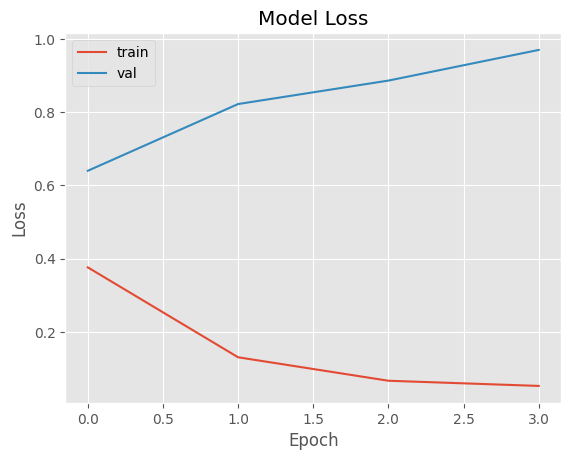

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

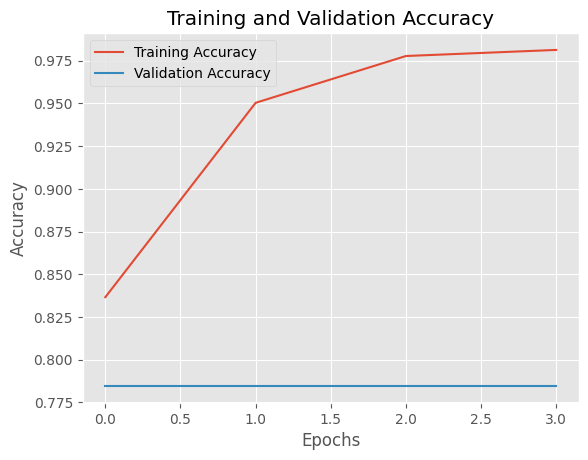

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 80.02%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 68s 624ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      1.00      0.89      2771
    Positive       0.00      0.00      0.00       692

    accuracy                           0.80      3463
   macro avg       0.40      0.50      0.44      3463
weighted avg       0.64      0.80      0.71      3463



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


109/109 ━━━━━━━━━━━━━━━━━━━━ 60s 550ms/step


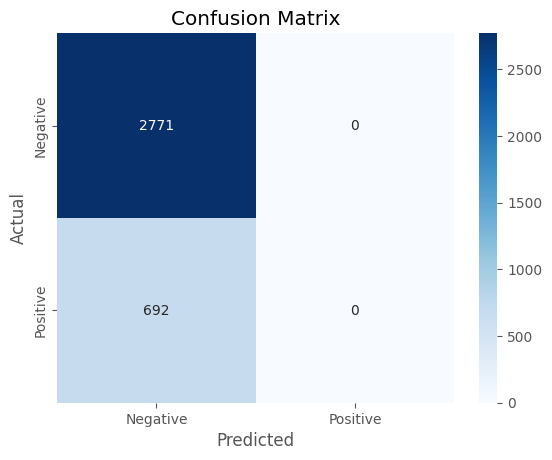

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      1.00      0.89      2771
    Positive       0.00      0.00      0.00       692

    accuracy                           0.80      3463
   macro avg       0.40      0.50      0.44      3463
weighted avg       0.64      0.80      0.71      3463



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.00854104  0.01759493  0.004229   ... -0.00479793  0.00657659
  -0.01394774]
 [-0.03111149  0.01232995 -0.03198162 ... -0.03067585 -0.01199162
  -0.00491954]
 [ 0.03284997  0.03917011  0.01072793 ... -0.02938614 -0.00964247
  -0.02796552]
 ...
 [ 0.00255176  0.00383744 -0.0126754  ...  0.04583091  0.03617695
  -0.04815672]
 [ 0.03600686 -0.04580677 -0.02958709 ... -0.02578204  0.03888633
  -0.01241576]
 [-0.02763097 -0.00065023 -0.00800478 ... -0.00761571  0.04947329
   0.045899  ]]


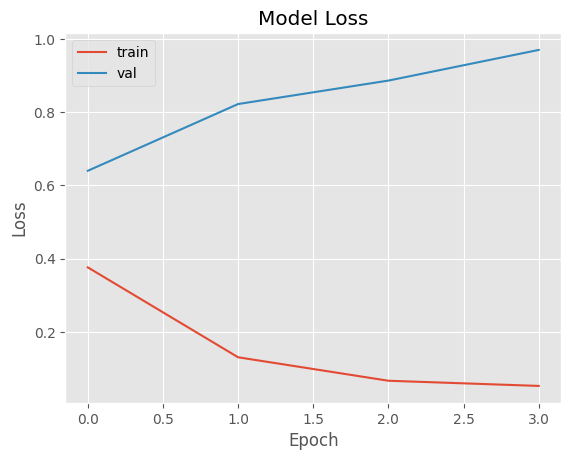

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## [GLOVE_Tweeter-LSTM](#p1)

#### Kütüphanelerin yüklenmesi

In [ ]:
"glove.twitter.27B.100d.txt"    # String olarak dosya ismi


'glove.twitter.27B.100d.txt'

In [ ]:
pip install tensorflow


In [ ]:
pip install keras


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
"""from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences"""

texts = ["just had coffee ☕", "lol that was crazy 😂", "good morning!! #monday"]

# Tokenizer ile kelimeleri ID'lere çevir
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Padding
maxlen = 20
X = pad_sequences(sequences, maxlen=maxlen, padding='post')


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Örnek olarak varsayalım df['Text'] tweetleri içeriyor
# df = pd.DataFrame({'Text': ["just had coffee ☕", "lol that was crazy 😂", "good morning!! #monday"]})

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[secilen_kolon_adi])

# Metinleri ID dizilerine çevir
sequences = tokenizer.texts_to_sequences(df[secilen_kolon_adi])

# Padding
maxlen = 20  # Sabit uzunluk belirle
X_Glove = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [ ]:
X_Glove

array([[  45,  404, 1026, ...,    0,    0,    0],
       [  45,   59, 2642, ...,    0,    0,    0],
       [  45,   59,  307, ...,    0,    0,    0],
       ...,
       [   5,   21,   35, ...,    0,    0,    0],
       [   5,  348,   46, ...,    0,    0,    0],
       [   5,  240,   62, ...,    0,    0,    0]], dtype=int32)

In [ ]:
with open("/content/drive/MyDrive/BitirmeMuammer/USAir/glove.twitter.27B.100d.txt", encoding='utf-8') as f:
    ...


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer'ı oluştur ve metinleri sayılara çevir
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Sabit uzunlukta pad işlemi
maxlen = 20
X = pad_sequences(sequences, maxlen=maxlen, padding='post')


Açıklamalar:
Tokenizer: df['text']'teki metinleri sayılara dönüştürmek için kullanıyoruz.

Padding: Metinleri aynı uzunlukta olacak şekilde (20 kelime) dolduruyoruz.

Embedding Matrix: Kelimeleri sayılara dönüştürdükten sonra, embedding_matrix içine GloVe vektörlerini yerleştiriyoruz.

embedding_index'ten aldığımız kelimenin vektörünü, Tokenizer'dan elde ettiğimiz kelime index'i ile eşleştiriyoruz.



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. GloVe vektörlerini yükleyelim
embedding_index = {}
with open("/content/drive/MyDrive/BitirmeMuammer/USAir/glove.twitter.27B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# 2. Tokenizer ve padding işlemi
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[secilen_kolon_adi])  # df['text'] üzerinden tokenizasyon
sequences = tokenizer.texts_to_sequences(df[secilen_kolon_adi])  # Metinleri sayılara çevir

# Sabit uzunlukta pad işlemi
maxlen = 20  # maxlen uzunluğu
X_Glove2 = pad_sequences(sequences, maxlen=maxlen, padding='post')

# 3. Embedding matrisi oluşturma
embedding_dim = 100  # Çünkü glove.twitter.27B.100d.txt
word_index = tokenizer.word_index
num_words = min(10000, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))  # Sıfırlardan oluşan boş bir matris

# Kelimelere karşılık embedding'leri yerleştir
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)  # GloVe'den vektörü al
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Vektörü matrise ekle

print(f"Embedding matrisi hazır, toplam {len(embedding_index)} kelime var.")


Embedding matrisi hazır, toplam 1193514 kelime var.


In [ ]:
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### Model1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # Binary classification örneği

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
# y, hedef değişkenin ikili (binary) sınıfları içeren numpy dizisi olmalı
# X, daha önce pad_sequences ile oluşturduğun giriş verisi

history = model.fit(
    x_train,               # giriş verisi (pad edilmiş diziler)
    y_train,               # hedef etiketler (0 veya 1)
    epochs=10,       # kaç kez tüm veriyi döneceğini belirler
    batch_size=32,   # her adımda kaç örnekle güncelleme yapılacağını belirler
    validation_split=0.2,  # %20 validation olarak ayrılır
    verbose=2        # eğitim sırasında ne kadar bilgi gösterileceği
)


Epoch 1/10
202/202 - 20s - 100ms/step - accuracy: 0.7926 - loss: 0.5238 - val_accuracy: 0.7847 - val_loss: 0.5252
Epoch 2/10
202/202 - 19s - 96ms/step - accuracy: 0.7953 - loss: 0.5086 - val_accuracy: 0.7847 - val_loss: 0.5229
Epoch 3/10
202/202 - 20s - 98ms/step - accuracy: 0.7953 - loss: 0.5081 - val_accuracy: 0.7847 - val_loss: 0.5211
Epoch 4/10
202/202 - 10s - 52ms/step - accuracy: 0.7953 - loss: 0.5085 - val_accuracy: 0.7847 - val_loss: 0.5210
Epoch 5/10
202/202 - 11s - 56ms/step - accuracy: 0.7953 - loss: 0.5078 - val_accuracy: 0.7847 - val_loss: 0.5210
Epoch 6/10
202/202 - 21s - 104ms/step - accuracy: 0.7953 - loss: 0.5077 - val_accuracy: 0.7847 - val_loss: 0.5210
Epoch 7/10
202/202 - 20s - 101ms/step - accuracy: 0.7953 - loss: 0.5081 - val_accuracy: 0.7847 - val_loss: 0.5266
Epoch 8/10
202/202 - 20s - 99ms/step - accuracy: 0.7953 - loss: 0.5083 - val_accuracy: 0.7847 - val_loss: 0.5210
Epoch 9/10
202/202 - 21s - 103ms/step - accuracy: 0.7953 - loss: 0.5076 - val_accuracy: 0.784

In [ ]:
# y, hedef değişkenin ikili (binary) sınıfları içeren numpy dizisi olmalı
# X, daha önce pad_sequences ile oluşturduğun giriş verisi

history = model.fit(
    x_train,               # giriş verisi (pad edilmiş diziler)
    y_train,               # hedef etiketler (0 veya 1)
    epochs=30,       # kaç kez tüm veriyi döneceğini belirler
    batch_size=32,   # her adımda kaç örnekle güncelleme yapılacağını belirler
    validation_split=0.2,  # %20 validation olarak ayrılır
    verbose=2        # eğitim sırasında ne kadar bilgi gösterileceği
)


Epoch 1/30
202/202 - 13s - 67ms/step - accuracy: 0.7953 - loss: 0.5076 - val_accuracy: 0.7847 - val_loss: 0.5217
Epoch 2/30
202/202 - 21s - 103ms/step - accuracy: 0.7953 - loss: 0.5074 - val_accuracy: 0.7847 - val_loss: 0.5220
Epoch 3/30
202/202 - 18s - 90ms/step - accuracy: 0.7953 - loss: 0.5080 - val_accuracy: 0.7847 - val_loss: 0.5211
Epoch 4/30
202/202 - 11s - 55ms/step - accuracy: 0.7953 - loss: 0.5073 - val_accuracy: 0.7847 - val_loss: 0.5226
Epoch 5/30
202/202 - 21s - 102ms/step - accuracy: 0.7953 - loss: 0.5073 - val_accuracy: 0.7847 - val_loss: 0.5240
Epoch 6/30
202/202 - 11s - 56ms/step - accuracy: 0.7953 - loss: 0.5076 - val_accuracy: 0.7847 - val_loss: 0.5248
Epoch 7/30
202/202 - 12s - 58ms/step - accuracy: 0.7953 - loss: 0.5077 - val_accuracy: 0.7847 - val_loss: 0.5231
Epoch 8/30
202/202 - 19s - 95ms/step - accuracy: 0.7953 - loss: 0.5069 - val_accuracy: 0.7847 - val_loss: 0.5210
Epoch 9/30
202/202 - 22s - 108ms/step - accuracy: 0.7953 - loss: 0.5077 - val_accuracy: 0.7847

#### Model LSTM_mine

In [ ]:
# 0 ve 1 output varsa
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Input(shape=(max_length,)))  # Giriş katmanı
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], trainable=False))  # Embedding katmanı
model.add(LSTM(ukuran_vektor, return_sequences=True))  # LSTM katmanı
model.add(GlobalMaxPooling1D())  # GlobalMaxPooling1D katmanı
model.add(Dense(128, activation='relu'))  # Dense katmanı
model.add(Dropout(0.2))  # Dropout katmanı
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı: 1 nöron, sigmoid aktivasyon

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# y, hedef değişkenin ikili (binary) sınıfları içeren numpy dizisi olmalı
# X, daha önce pad_sequences ile oluşturduğun giriş verisi

history = model.fit(
    x_train,               # giriş verisi (pad edilmiş diziler)
    y_train,               # hedef etiketler (0 veya 1)
    epochs=30,       # kaç kez tüm veriyi döneceğini belirler
    batch_size=32,   # her adımda kaç örnekle güncelleme yapılacağını belirler
    validation_split=0.2,  # %20 validation olarak ayrılır
    verbose=2        # eğitim sırasında ne kadar bilgi gösterileceği
)


Epoch 1/30
202/202 - 20s - 100ms/step - accuracy: 0.7906 - loss: 0.5177 - val_accuracy: 0.7847 - val_loss: 0.5160
Epoch 2/30
202/202 - 16s - 79ms/step - accuracy: 0.8005 - loss: 0.4680 - val_accuracy: 0.8113 - val_loss: 0.4493
Epoch 3/30
202/202 - 16s - 80ms/step - accuracy: 0.8409 - loss: 0.3988 - val_accuracy: 0.8465 - val_loss: 0.3795
Epoch 4/30
202/202 - 22s - 108ms/step - accuracy: 0.8590 - loss: 0.3671 - val_accuracy: 0.8546 - val_loss: 0.3657
Epoch 5/30
202/202 - 21s - 104ms/step - accuracy: 0.8601 - loss: 0.3500 - val_accuracy: 0.8533 - val_loss: 0.3501
Epoch 6/30
202/202 - 19s - 92ms/step - accuracy: 0.8685 - loss: 0.3371 - val_accuracy: 0.8682 - val_loss: 0.3368
Epoch 7/30
202/202 - 20s - 100ms/step - accuracy: 0.8720 - loss: 0.3209 - val_accuracy: 0.8608 - val_loss: 0.3442
Epoch 8/30
202/202 - 16s - 80ms/step - accuracy: 0.8768 - loss: 0.3112 - val_accuracy: 0.8750 - val_loss: 0.3169
Epoch 9/30
202/202 - 16s - 79ms/step - accuracy: 0.8787 - loss: 0.2997 - val_accuracy: 0.867

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 87.24%


In [ ]:
#2 sınıf için
from sklearn.metrics import classification_report

# Olasılık tahminlerini al
y_pred_prob = model.predict(x_test)  # Sonuçlar 0-1 arası değerler

# 0.5 eşik değeri ile sınıf tahminine çevir
y_pred_classes = (y_pred_prob >= 0.5).astype(int)

# Classification report yazdır
report = classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.93      0.92      2771
    Positive       0.69      0.66      0.67       692

    accuracy                           0.87      3463
   macro avg       0.80      0.79      0.80      3463
weighted avg       0.87      0.87      0.87      3463



109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


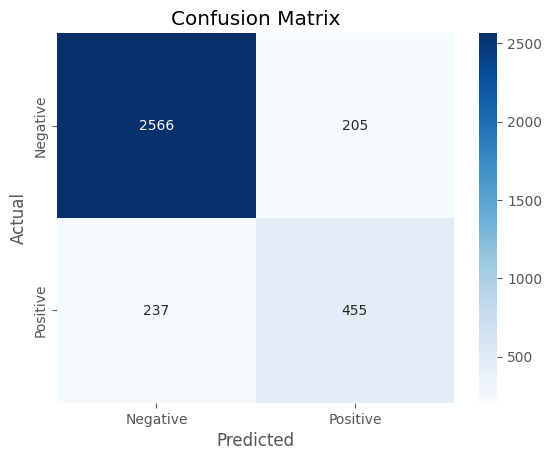

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.93      0.92      2771
    Positive       0.69      0.66      0.67       692

    accuracy                           0.87      3463
   macro avg       0.80      0.79      0.80      3463
weighted avg       0.87      0.87      0.87      3463



In [ ]:
#2 Sınıf varsa
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(x_test)                         # Olasılıklar (0-1 arası)
y_pred = (y_pred_prob >= 0.5).astype(int)                 # 0.5 eşik ile sınıf tahmini

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(cnn.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 8673, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(cnn.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1219    -0.65646    0.50855   ... -0.23317   -0.013865  -0.78455  ]
 [ 0.21733    0.56116    0.63062   ...  0.0098267  0.39708   -0.34708  ]
 ...
 [ 0.76337   -0.10913   -0.60247   ... -0.28679   -0.32503    0.21777  ]
 [ 0.58078   -0.56018   -0.24877   ... -0.32196    0.18122   -0.37865  ]
 [-1.5448     0.17873   -0.061989  ...  0.49215   -0.34351    0.080519 ]]


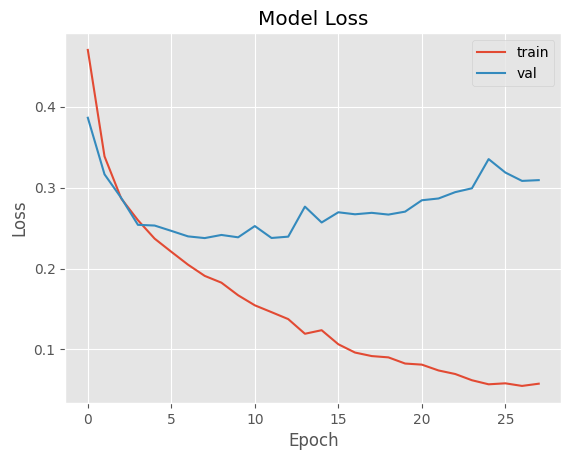

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## [XGBOOST](#p1)

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(8078, 8652) (3463, 8652)


In [ ]:
print(test_vectors)

  (0, 1122)	0.2956512097778964
  (0, 1251)	0.5829225217390113
  (0, 2888)	0.19207392256375574
  (0, 2912)	0.3545495179776315
  (0, 7959)	0.6057224161162913
  (0, 8116)	0.2080728189681252
  (1, 2888)	0.18370963524190967
  (1, 3329)	0.7435009890042171
  (1, 4065)	0.24134173852809165
  (1, 8203)	0.5959959853164061
  (2, 95)	0.30874138319712685
  (2, 159)	0.22297132012461685
  (2, 600)	0.32507679343111273
  (2, 893)	0.29409728342511116
  (2, 2888)	0.1166134133442403
  (2, 3190)	0.21431125225485195
  (2, 4418)	0.26072021510799165
  (2, 4859)	0.277076633911027
  (2, 5933)	0.24745463800970213
  (2, 6220)	0.3392643541601131
  (2, 6536)	0.2792663806468177
  (2, 7172)	0.3710361566130812
  (2, 8010)	0.11693515376938247
  (2, 8259)	0.22990095993845938
  (3, 0)	0.236343312225005
  :	:
  (3459, 8010)	0.14658729938325488
  (3460, 1055)	0.2898292786417996
  (3460, 3273)	0.4655355225109413
  (3460, 4438)	0.316905701945794
  (3460, 5556)	0.2594323799058463
  (3460, 5722)	0.1993117100878429
  (3460, 5754

###### XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
# XGBoost sınıflandırıcıyı oluştur ve eğit
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(train_vectors, y_train)

# Test verileriyle tahmin yap
y_pred = model.predict(test_vectors)

# Sonuçları yazdır
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı: 0.9055732024256425

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2771
           1       0.84      0.65      0.73       692

    accuracy                           0.91      3463
   macro avg       0.88      0.81      0.84      3463
weighted avg       0.90      0.91      0.90      3463



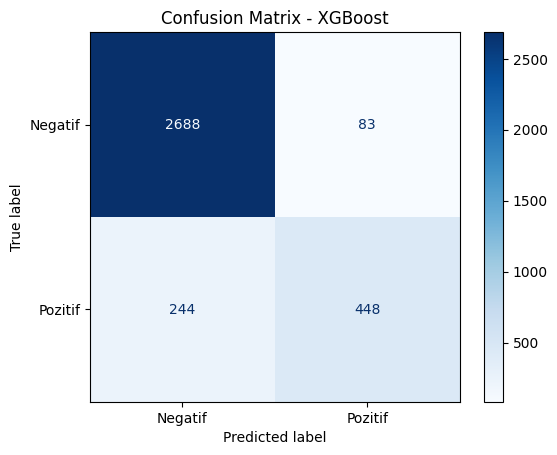

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatif", "Pozitif"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()


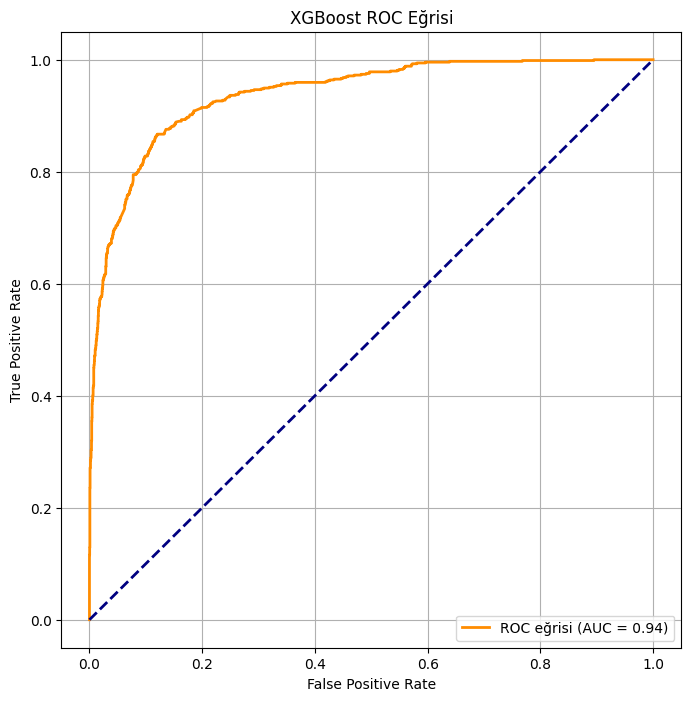

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Olasılık tahminleri (pozitif sınıf için)
y_proba = model.predict_proba(test_vectors)[:, 1]

# ROC curve ve AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## [TF-IDF TEMELLİ XGBOOST](#p1)

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(8078, 8652) (3463, 8652)


In [ ]:
print(test_vectors)

  (0, 1122)	0.2956512097778964
  (0, 1251)	0.5829225217390113
  (0, 2888)	0.19207392256375574
  (0, 2912)	0.3545495179776315
  (0, 7959)	0.6057224161162913
  (0, 8116)	0.2080728189681252
  (1, 2888)	0.18370963524190967
  (1, 3329)	0.7435009890042171
  (1, 4065)	0.24134173852809165
  (1, 8203)	0.5959959853164061
  (2, 95)	0.30874138319712685
  (2, 159)	0.22297132012461685
  (2, 600)	0.32507679343111273
  (2, 893)	0.29409728342511116
  (2, 2888)	0.1166134133442403
  (2, 3190)	0.21431125225485195
  (2, 4418)	0.26072021510799165
  (2, 4859)	0.277076633911027
  (2, 5933)	0.24745463800970213
  (2, 6220)	0.3392643541601131
  (2, 6536)	0.2792663806468177
  (2, 7172)	0.3710361566130812
  (2, 8010)	0.11693515376938247
  (2, 8259)	0.22990095993845938
  (3, 0)	0.236343312225005
  :	:
  (3459, 8010)	0.14658729938325488
  (3460, 1055)	0.2898292786417996
  (3460, 3273)	0.4655355225109413
  (3460, 4438)	0.316905701945794
  (3460, 5556)	0.2594323799058463
  (3460, 5722)	0.1993117100878429
  (3460, 5754

###### XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
# XGBoost sınıflandırıcıyı oluştur ve eğit
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(train_vectors, y_train)

# Test verileriyle tahmin yap
y_pred = model.predict(test_vectors)

# Sonuçları yazdır
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı: 0.9055732024256425

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2771
           1       0.84      0.65      0.73       692

    accuracy                           0.91      3463
   macro avg       0.88      0.81      0.84      3463
weighted avg       0.90      0.91      0.90      3463



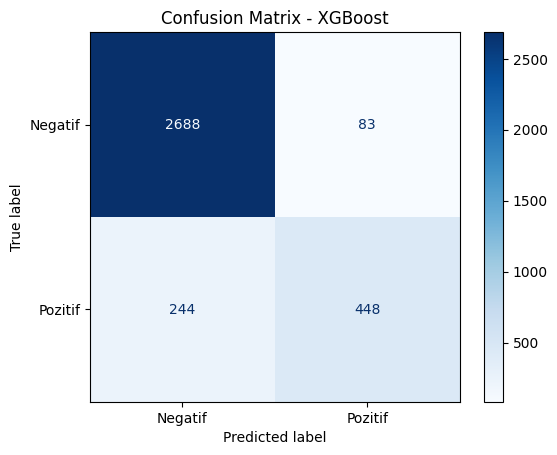

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatif", "Pozitif"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()


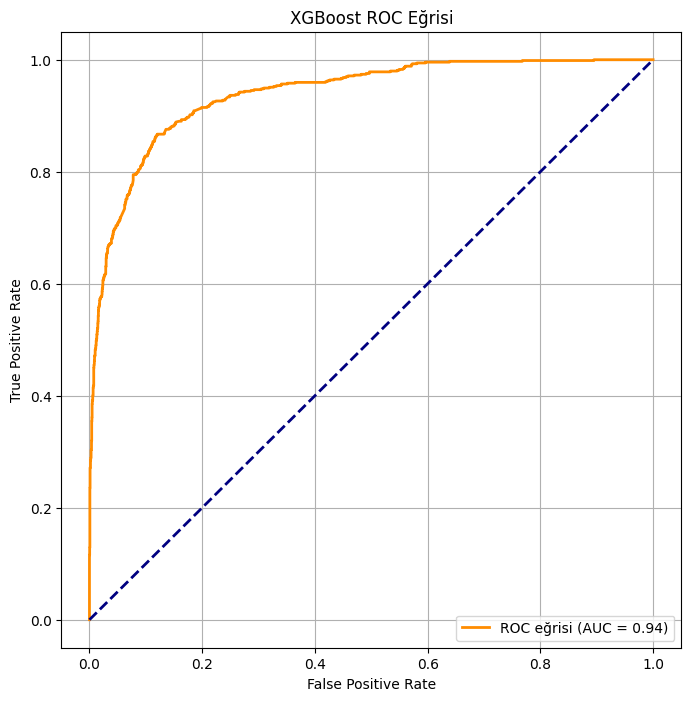

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Olasılık tahminleri (pozitif sınıf için)
y_proba = model.predict_proba(test_vectors)[:, 1]

# ROC curve ve AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC eğrisi çizimi
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Son